In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler

import pylab
import scipy.stats as stats

In [4]:
from google.colab import files
uploaded = files.upload()


Saving test.csv to test.csv
Saving train.csv to train.csv


In [0]:
# Importing training data
pd.set_option('display.max_columns', 500)
train = pd.read_csv('train.csv')

In [0]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Exploratory Data Analysis

1) Feature enginneering
2) Feature selection



1) Feature Engineering

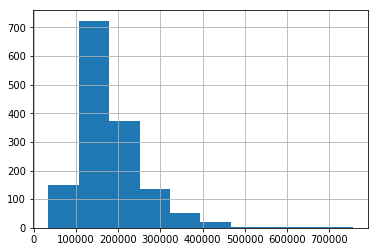

In [0]:
# Look for distribution of y variable

train['SalePrice'].hist()

In [0]:
# Checking whether all variables are in correct data type
# Types of Variables
pd.set_option('display.max_rows', 500)
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [0]:
# # Convert some variables to correct data type
# train['MSSubClass'] = train['MSSubClass'].astype(str)


In [0]:
# Find categorical variables
 categorical = [var for var in train.columns if train[var].dtype == 'O']
print('There are {} categorical variables'.format(len(categorical)))

There are 43 categorical variables


In [0]:
# Find temporal variables  
# YearBuilt, YearRemodAdd, GarageYrBlt, YrSold
numerical = [var for var in train.columns if train[var].dtype != 'O']
year_vars = [var for var in numerical if 'Yr' in var or 'Year' in var]
year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Text(0.5, 0, 'month')

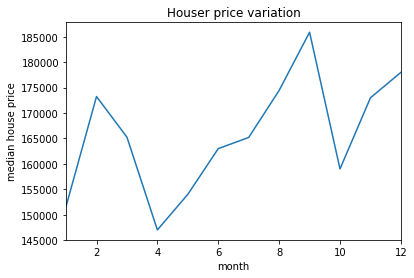

In [0]:
# There is one more variable called 'MoSold' which indicates the month house was sold
# Lets see whether month effects selling price
train.groupby('MoSold')['SalePrice'].median().plot()
plt.title('Houser price variation')
plt.ylabel('median house price')
plt.xlabel('month')


In [0]:
# Price depends on month of house sold. So this variable have some useful information

In [0]:
## Find discrte variables
discrete = []
for var in numerical:
  if len(train[var].unique()) < 20 and var not in year_vars:
    print(var, 'values:',train[var].unique())
    discrete.append(var)
 

MSSubClass values: [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
OverallQual values: [ 7  6  8  5  9  4 10  3  1  2]
OverallCond values: [5 8 6 7 4 2 3 9 1]
BsmtFullBath values: [1 0 2 3]
BsmtHalfBath values: [0 1 2]
FullBath values: [2 1 3 0]
HalfBath values: [1 0 2]
BedroomAbvGr values: [3 4 1 2 0 5 6 8]
KitchenAbvGr values: [1 2 3 0]
TotRmsAbvGrd values: [ 8  6  7  9  5 11  4 10 12  3  2 14]
Fireplaces values: [0 1 2 3]
GarageCars values: [2 3 1 0 4]
PoolArea values: [  0 512 648 576 555 480 519 738]
MoSold values: [ 2  5  9 12 10  8 11  4  1  7  3  6]


In [0]:
# Continuos variables
numerical = [var for var in numerical if var not in ['Id','SalePrice'] and var not in year_vars and var not in discrete]
print('There are {} numerical variables'.format(len(numerical)))

There are 18 numerical variables



**Now lets inspect different types of problems we might have in our variables**

## Missing Values


In [0]:
# Lets see missing values in numerical variables
for var in numerical:
  if train[var].isna().sum() > 0:
    print(var,train[var].isna().mean())

LotFrontage 0.1773972602739726
MasVnrArea 0.005479452054794521


In [0]:
# Lets see missing values in categorical variables
for var in categorical:
  if train[var].isna().sum() > 0:
    print(var,train[var].isna().mean())

Alley 0.9376712328767123
MasVnrType 0.005479452054794521
BsmtQual 0.025342465753424658
BsmtCond 0.025342465753424658
BsmtExposure 0.026027397260273973
BsmtFinType1 0.025342465753424658
BsmtFinType2 0.026027397260273973
Electrical 0.0006849315068493151
FireplaceQu 0.4726027397260274
GarageType 0.05547945205479452
GarageFinish 0.05547945205479452
GarageQual 0.05547945205479452
GarageCond 0.05547945205479452
PoolQC 0.9952054794520548
Fence 0.8075342465753425
MiscFeature 0.963013698630137


In [0]:
# Lets see missing values in discrete and temperal variables
for var in discrete:
  if train[var].isna().sum() > 0:
    print(var,train[var].isna().mean())
    
for var in year_vars:
  if train[var].isna().sum() > 0:
    print(var,train[var].isna().mean())

GarageYrBlt 0.05547945205479452


There are no missing values in descrete variables but missing values in **GarageYrBlt**

In [0]:
# Lets see in total how many variables have missing information
vars_with_na = [var for var in train.columns if train[var].isna().sum() > 0]
print('There are {} variables with missing information'.format(len(vars_with_na)))

There are 19 variables with missing information


We will take care of missing value problem in feature engineering section

## Outliers

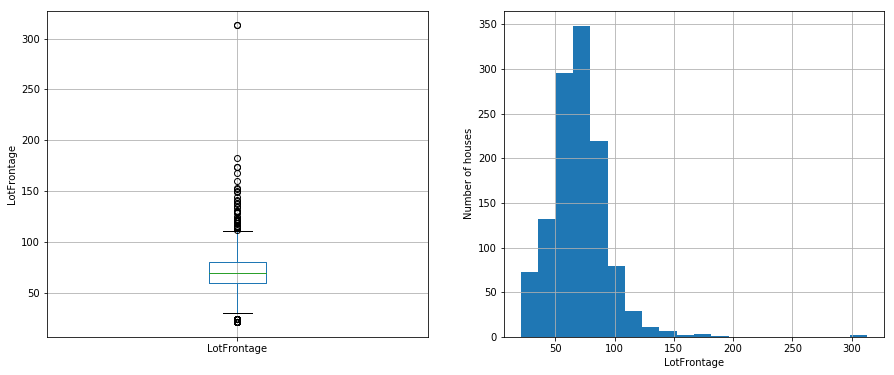

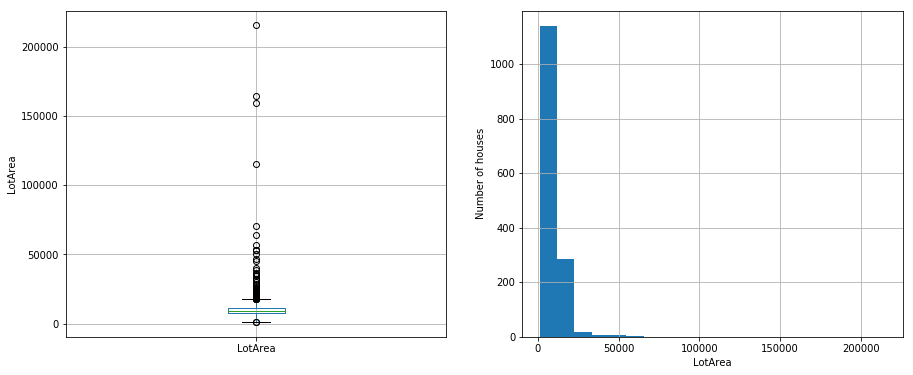

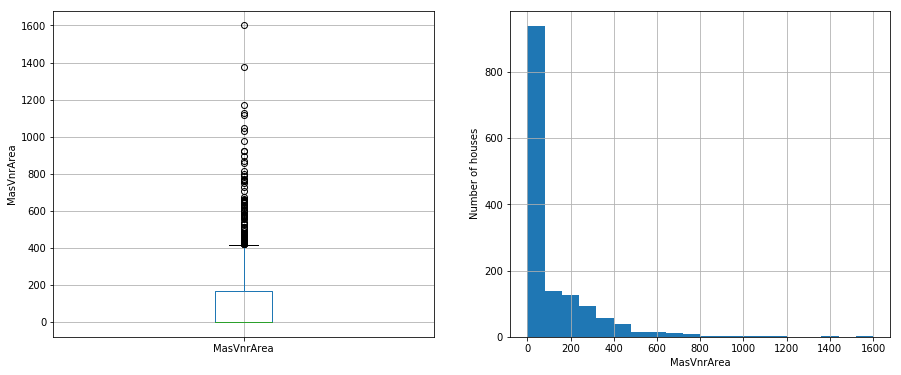

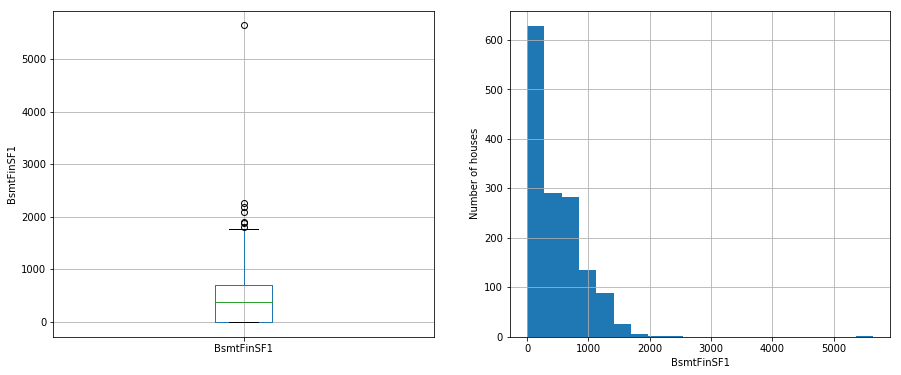

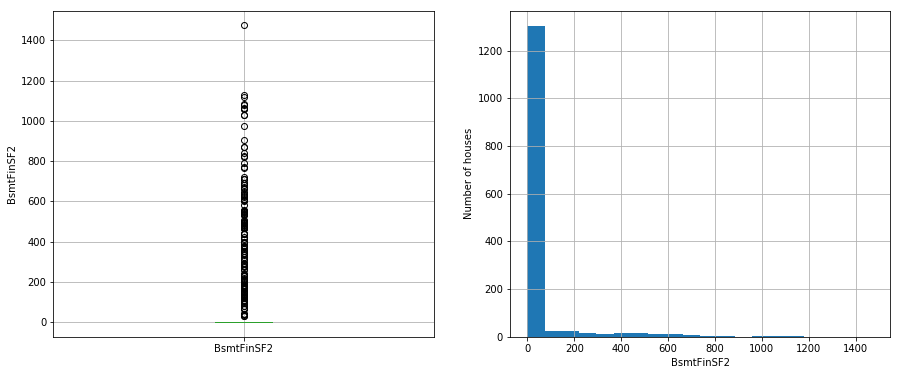

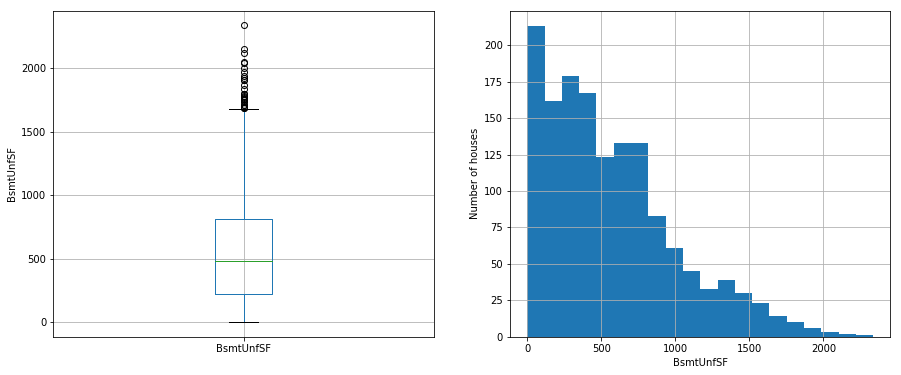

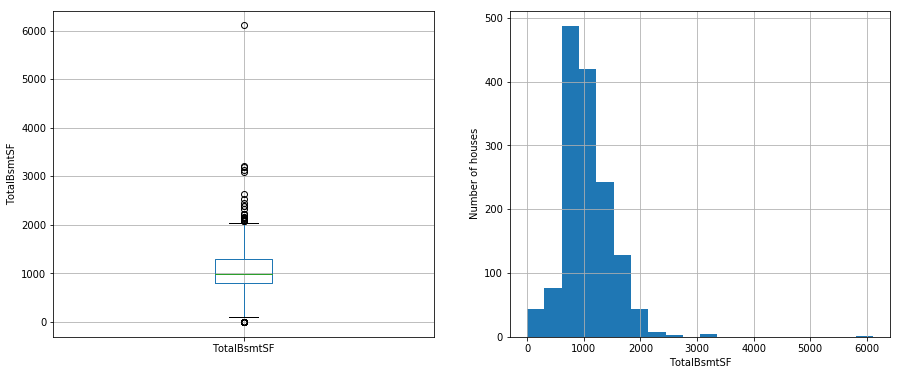

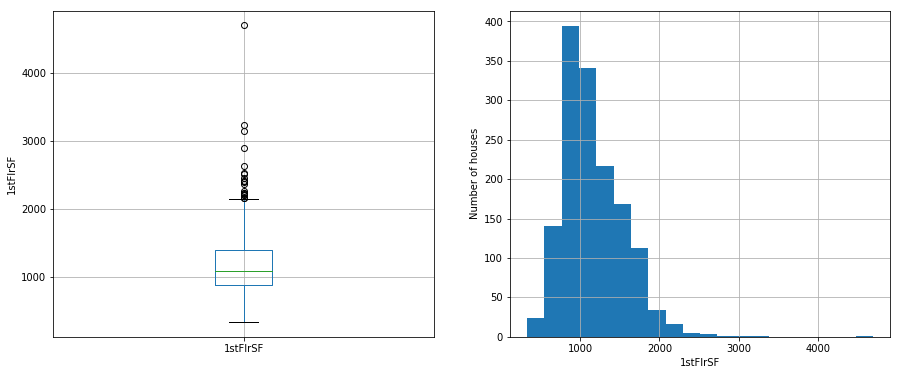

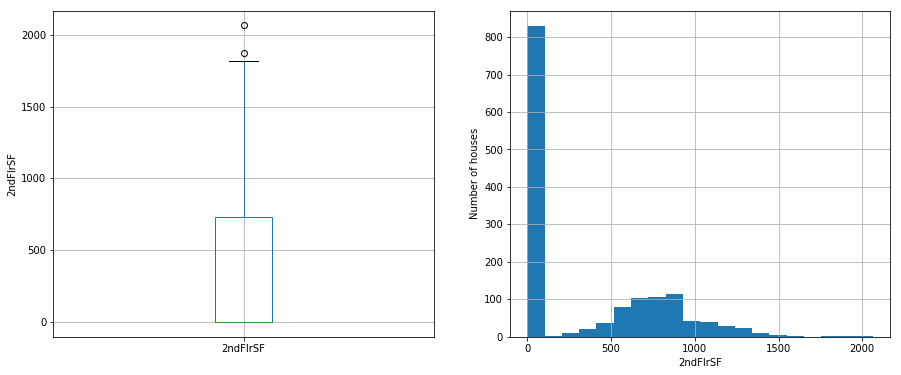

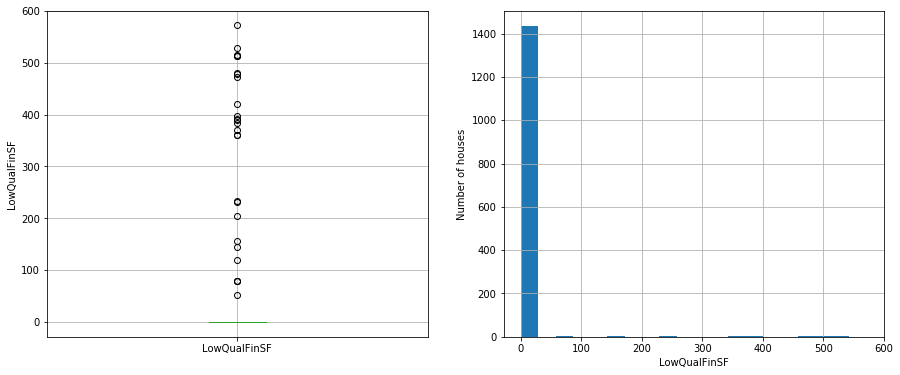

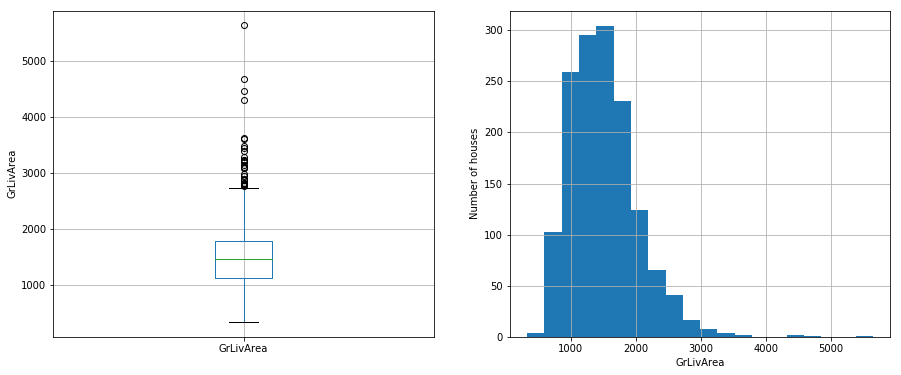

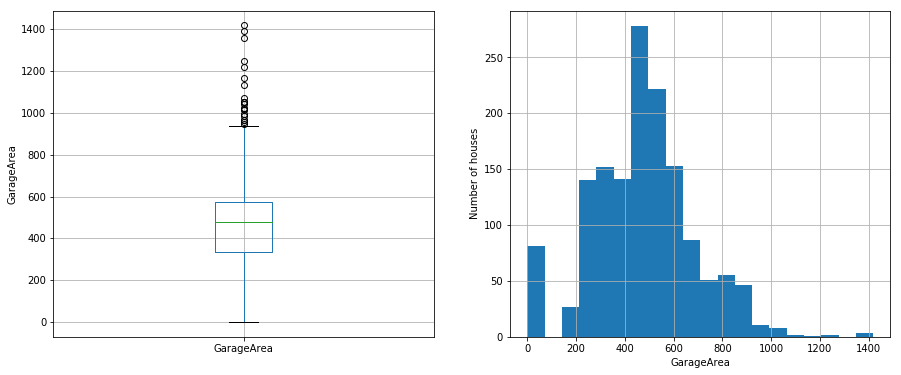

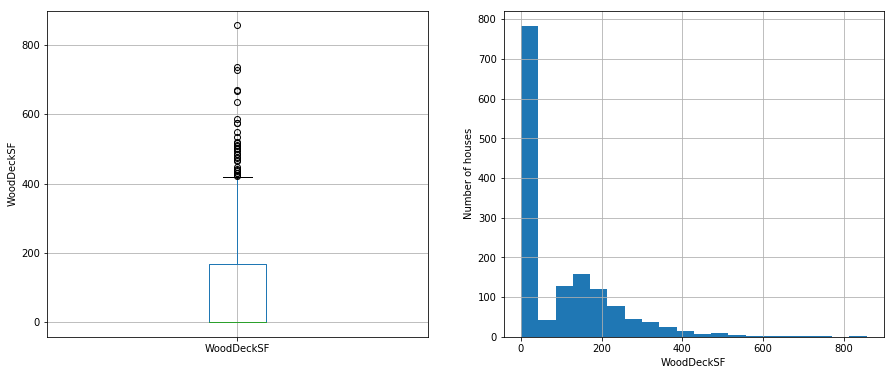

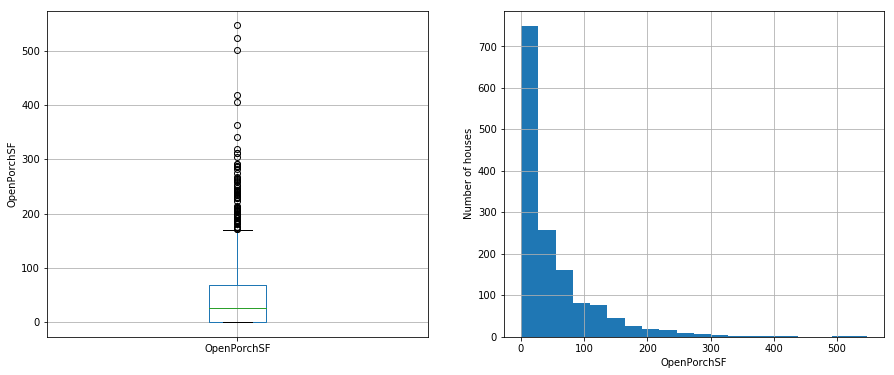

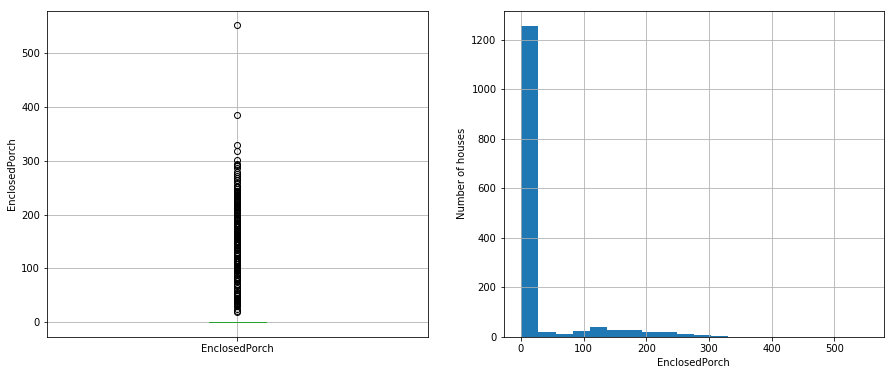

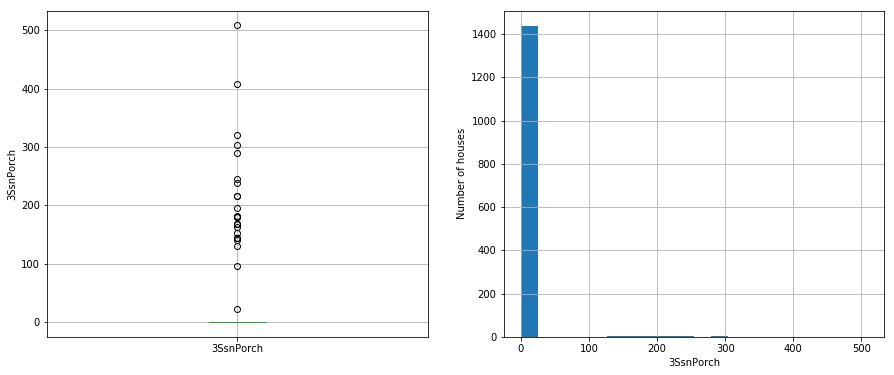

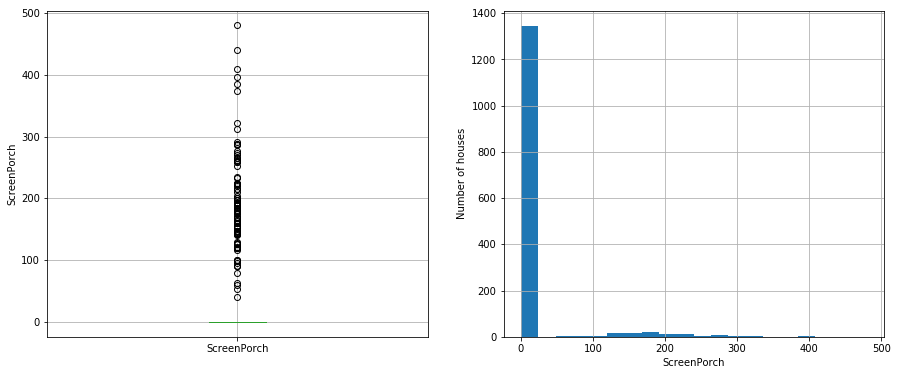

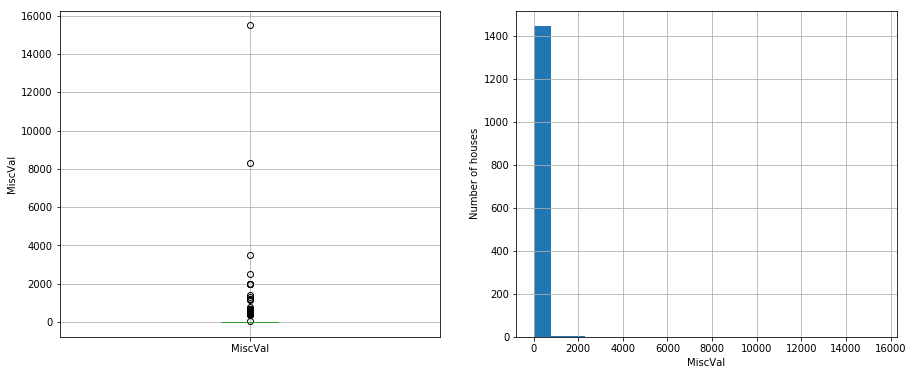

In [0]:
# Outliers in numerical variables
# Lets use boxplots to visualize outliers
for var in numerical:
  plt.figure(figsize = (15,6))
  plt.subplot(1,2,1)
  fig = train.boxplot(column = var)
  fig.set_ylabel(var)
  
  
  plt.subplot(1,2,2)
  fig = train[var].hist(bins = 20)
  fig.set_ylabel('Number of houses')
  fig.set_xlabel(var)
  
  plt.show()


Majority of numeric variables contain outliers. We will take care of these in future

## Number of labels : Cardinality

Text(0, 0.5, 'Number of labels')

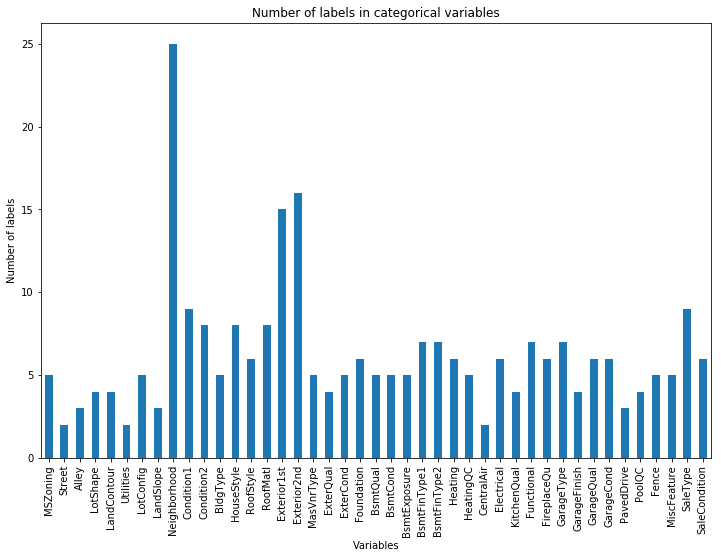

In [0]:
# Next step is to see if any of categorical variables have problem of high cardinality.
no_labels_ls = []
for var in categorical:
  no_labels_ls.append(len(train[var].unique()))
  
tmp = pd.Series(no_labels_ls)
tmp.index = pd.Series(categorical)
tmp.plot.bar(figsize = (12,8))
plt.title('Number of labels in categorical variables')
plt.xlabel('Variables')
plt.ylabel('Number of labels')

Since we do not have any variable with lot of lables. We are good

## Now lets see the problem of Rare labels in Categorical variables and discrete variables

For simplicity I group categorical variables in to 2 categories

1) Variables with one predominat category

2) Other categorical variables

Rare labels can be present in any one or all of above 2 groups.


In [0]:
# Variables with one predominant Category. With above 95% of records
predcol = []
for col in categorical:
#   if len(train[col].unique()) < 3:
#     print(train[col].value_counts()/len(train[col]))
    
  tmp = pd.DataFrame(train.groupby(col)[col].count()/len(train[col]))
  tmp.columns = ['value']
  tmp.reset_index(inplace=True)
  tmp.columns = ['Label','Value']
  if any(tmp.Value > 0.95):
    predcol.append(col)
    #print(train.groupby(col)[col].count()/len(train[col]))
print(predcol)
  

['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating']


#### We can see for **Street** ,**Utilities**, **Condtion2, RoofMat1, Heating** we have one dominating label. Its best to remove these variables as they dont provide much information

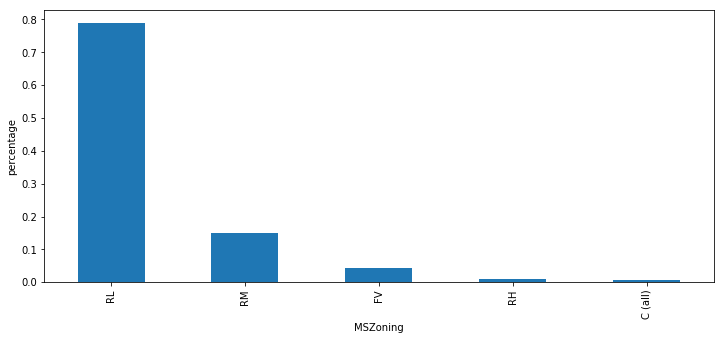

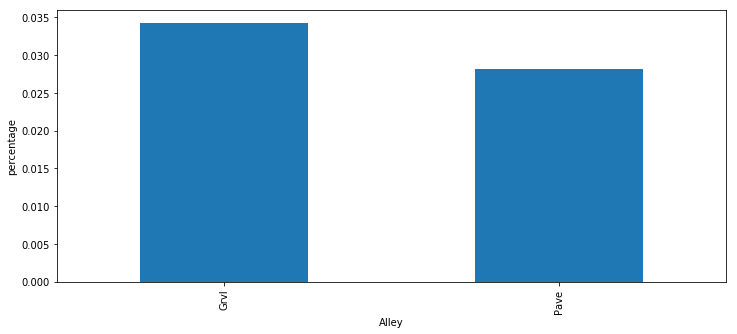

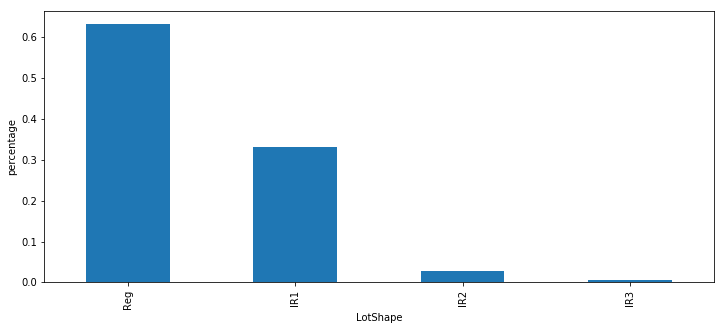

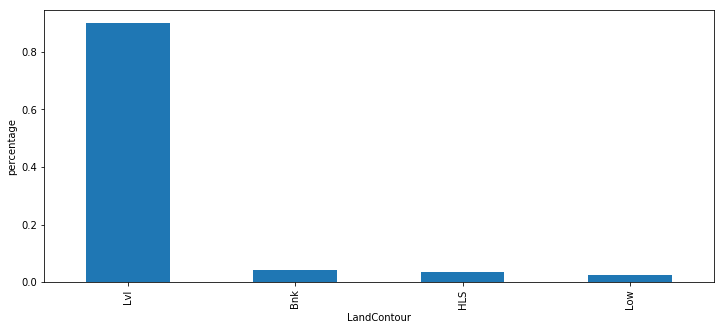

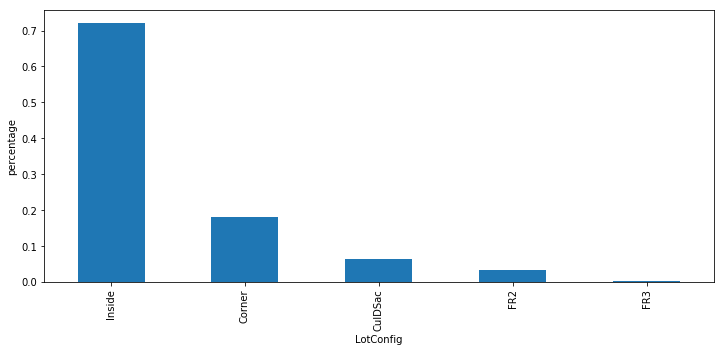

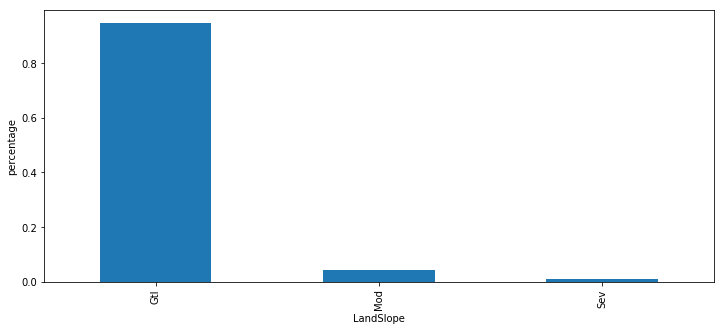

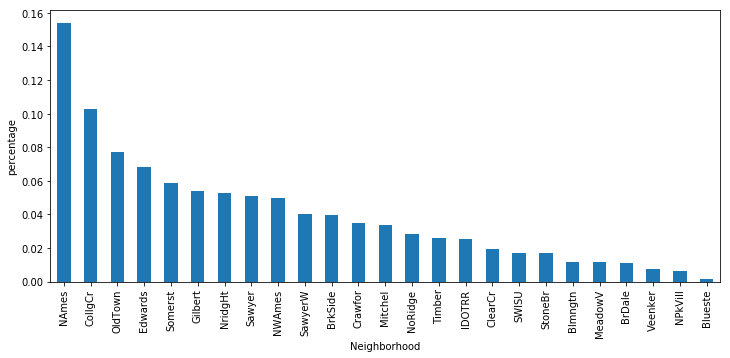

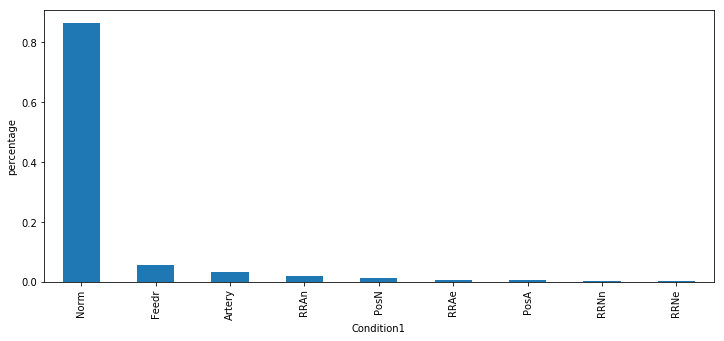

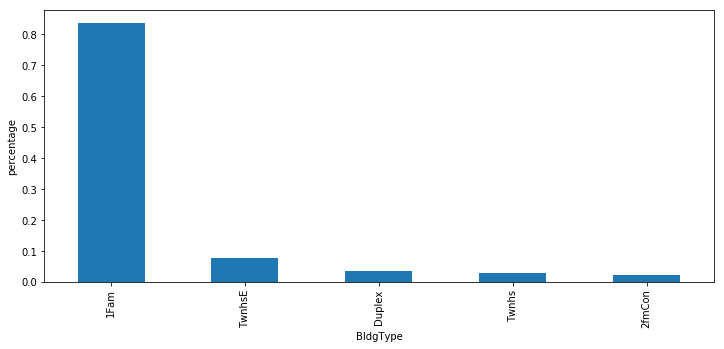

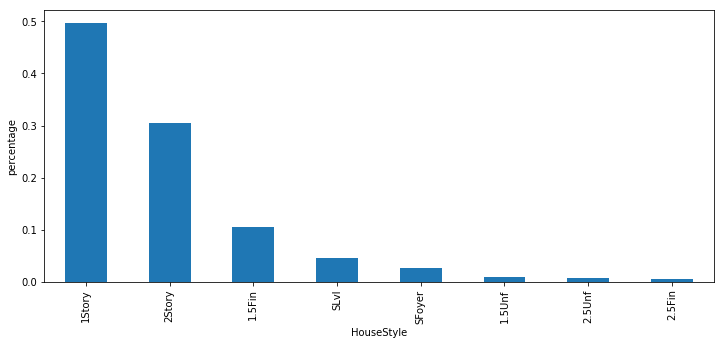

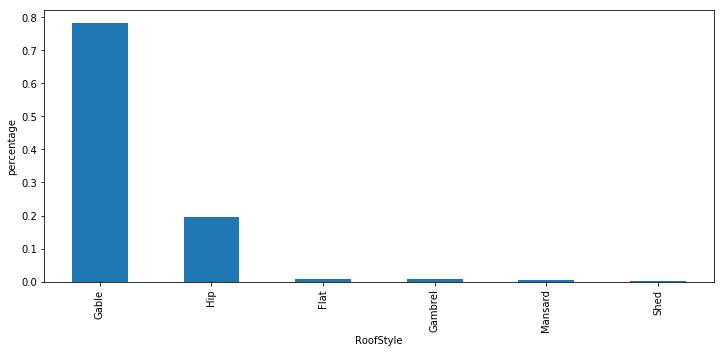

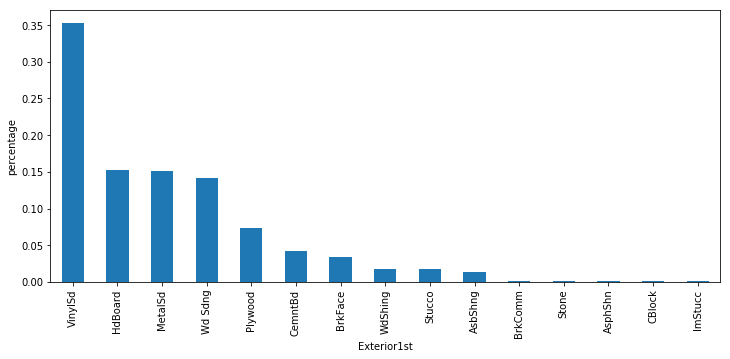

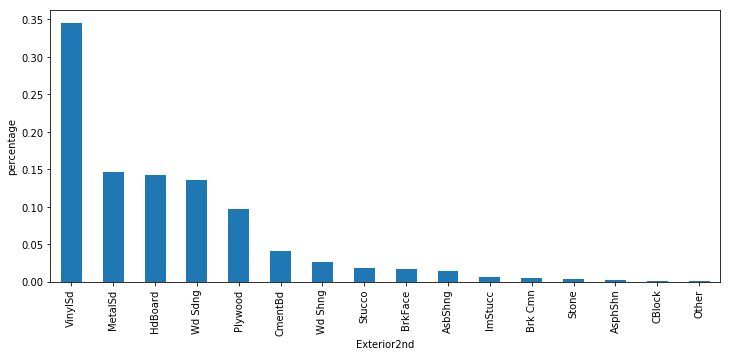

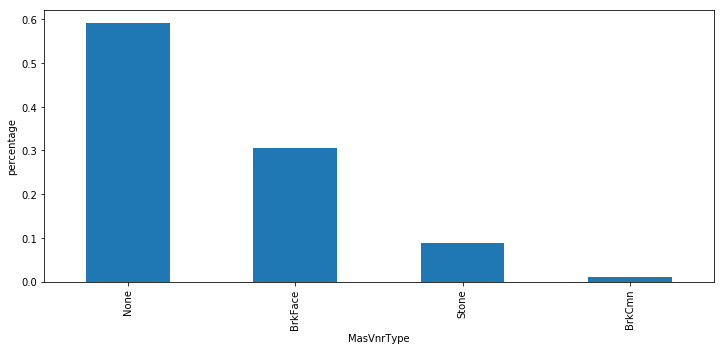

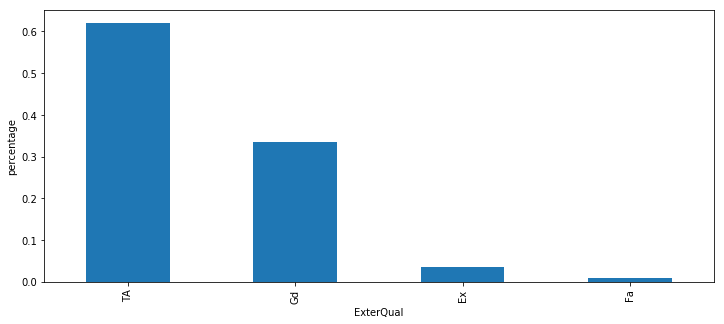

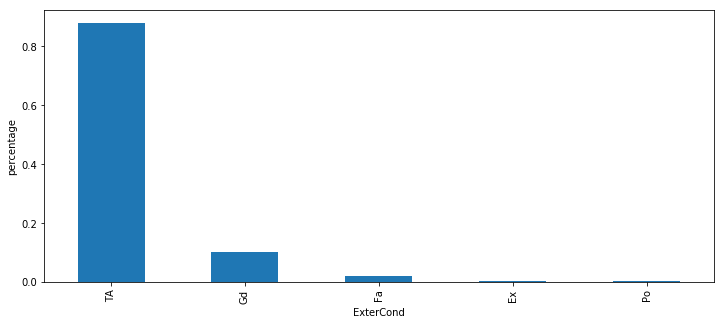

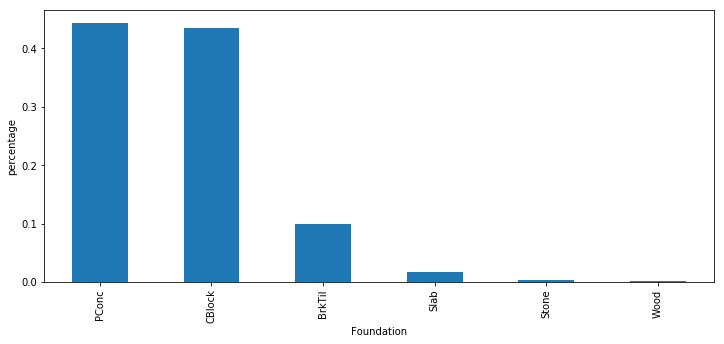

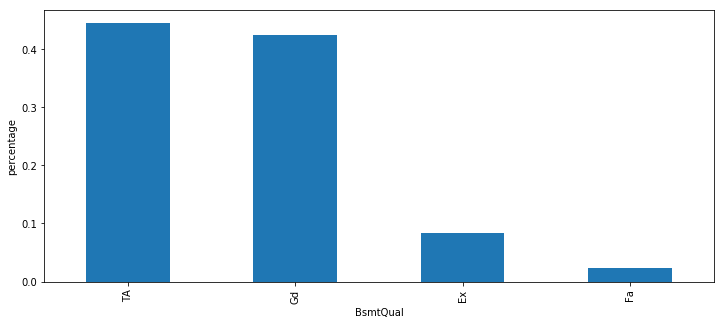

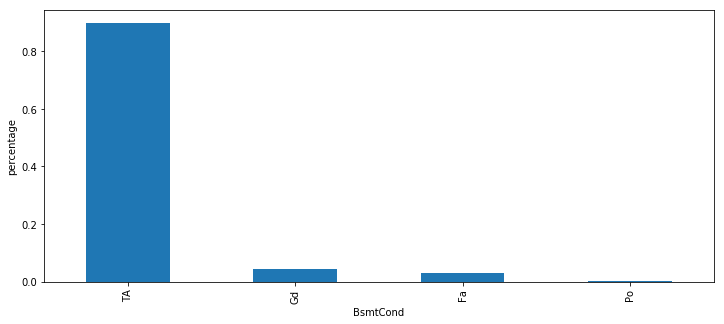

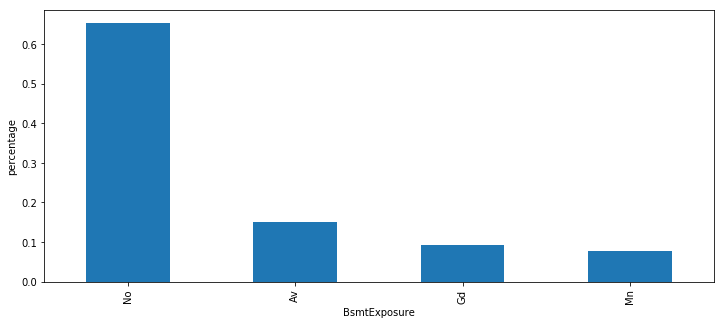

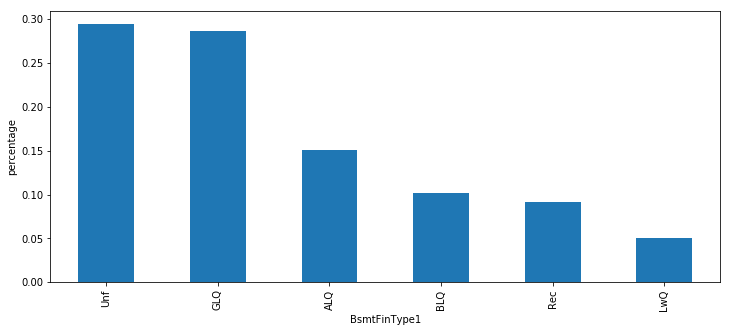

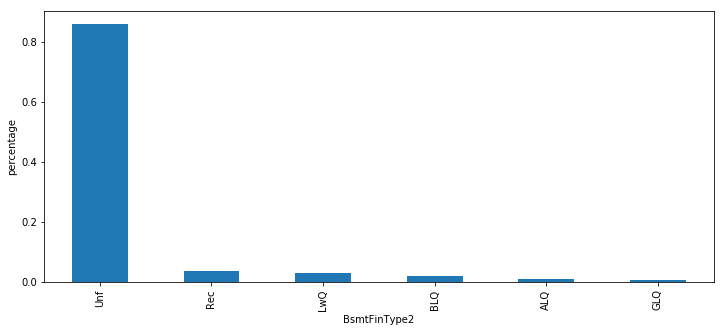

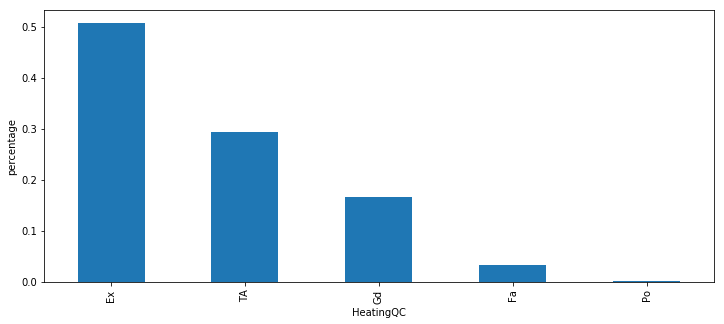

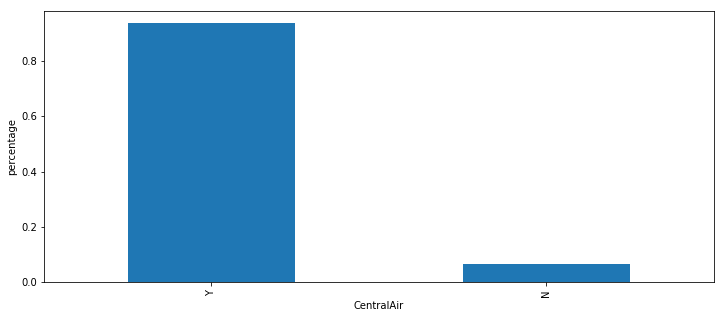

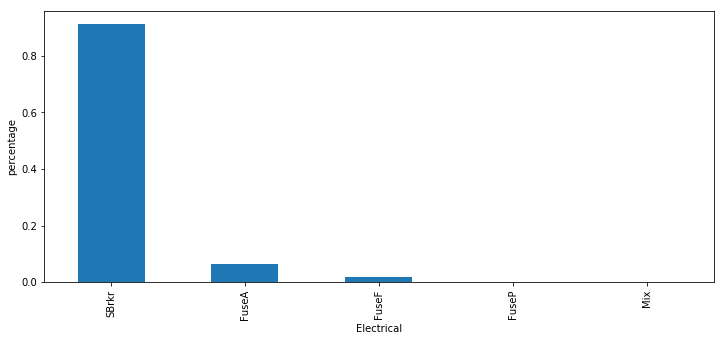

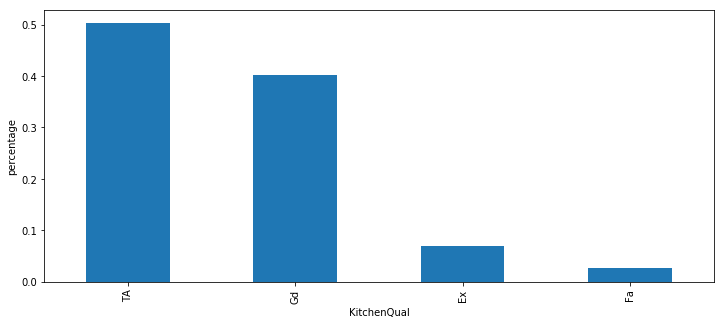

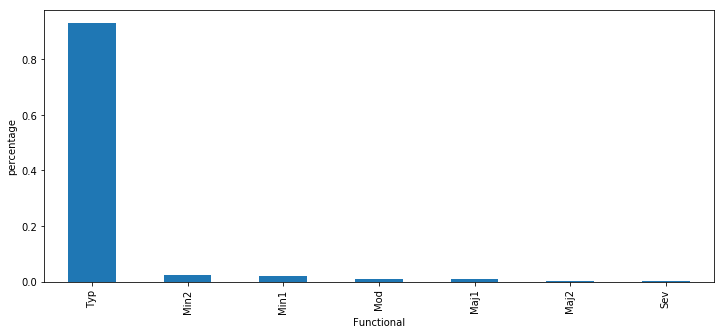

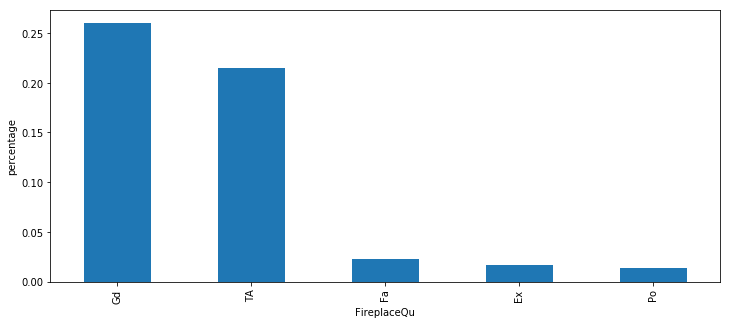

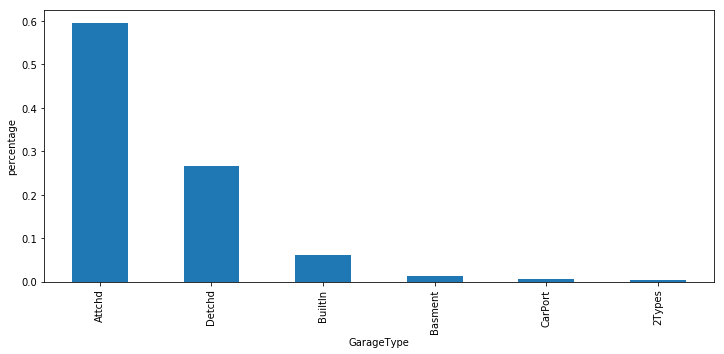

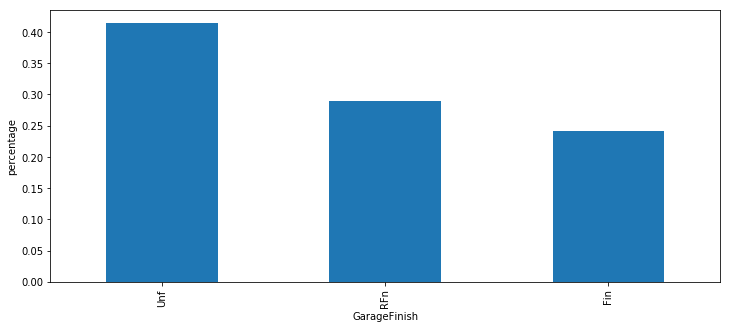

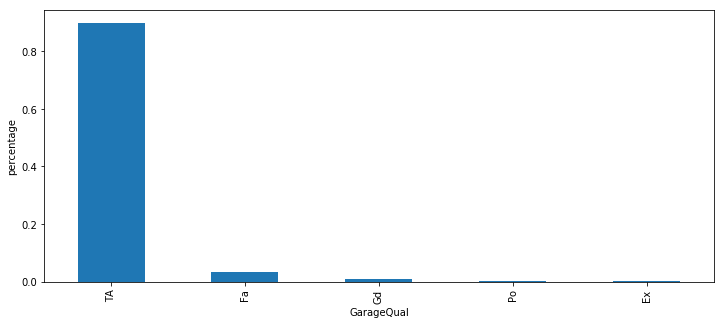

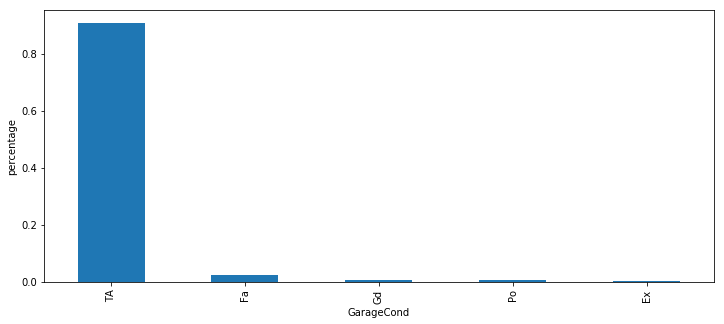

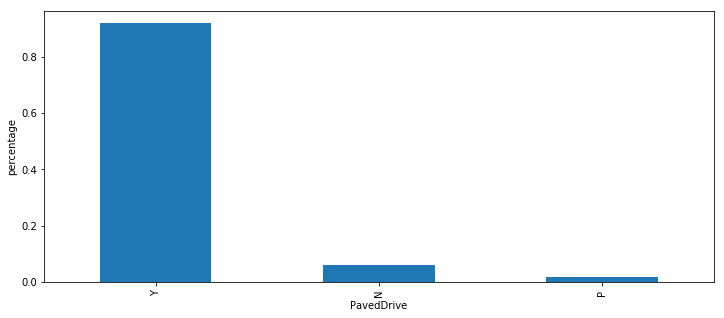

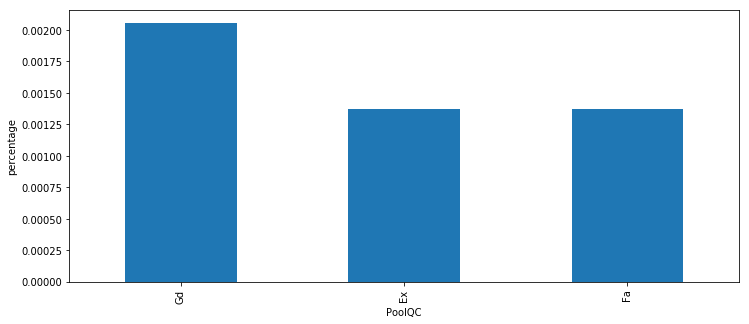

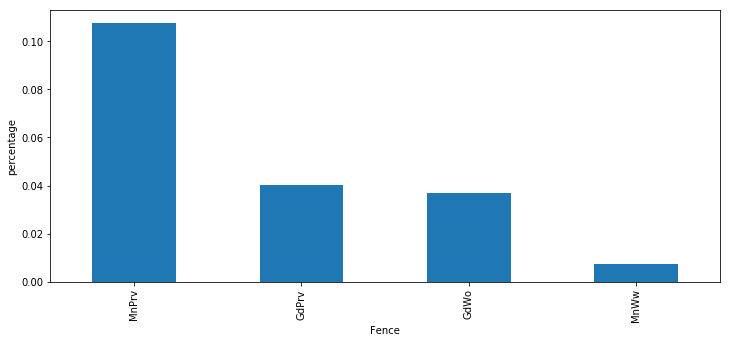

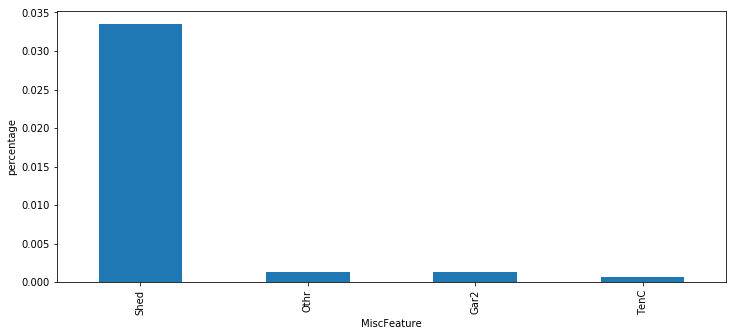

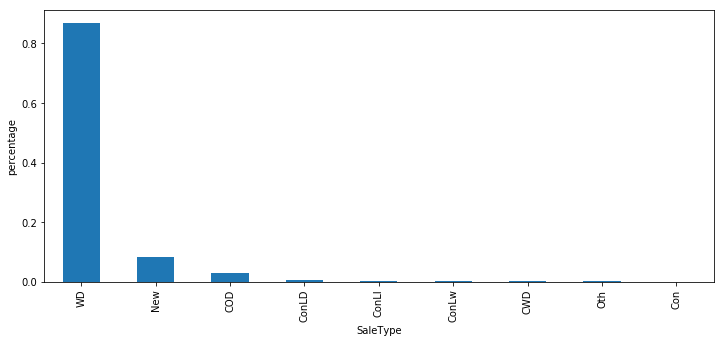

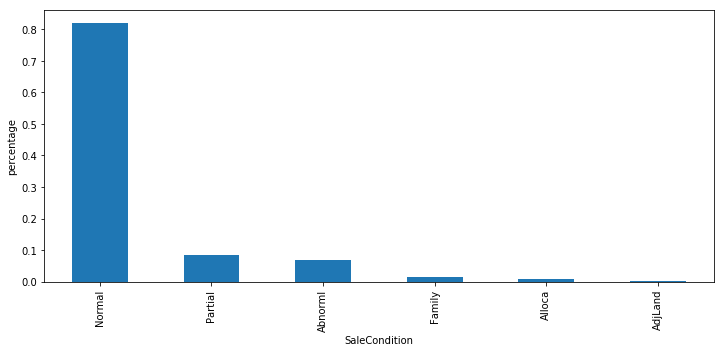

In [0]:
# Rare labels in other categorical variables

total = len(train)
cols_to_use = [col for col in categorical if col not in predcol]
for col in cols_to_use:
  temp_df = pd.Series(train[col].value_counts()/total)
  plt.figure(figsize = (12,5))
  plt.subplot(1,1,1)
  fig = temp_df.sort_values(ascending=False).plot.bar()
  fig.set_xlabel(col)
  fig.set_ylabel('percentage')
  plt.show()
  

#### We can see rare labels in some categorical variables. We will take care of them in coming sections

#### Now lets see rare labels in discrete variables
 Here also I would group variables in to two groups
 
 1) Variables with one predominat category.
 
 2) Other variables

In [0]:
# Variables with one predominant Category. With above 95% of records
predcol_disc = []
for col in discrete:
#   if len(train[col].unique()) < 3:
#     print(train[col].value_counts()/len(train[col]))
    
  tmp = pd.DataFrame(train.groupby(col)[col].count()/len(train[col]))
  tmp.columns = ['value']
  tmp.reset_index(inplace=True)
  tmp.columns = ['Label','Value']
  if any(tmp.Value > 0.95):
    predcol_disc.append(col)
    
  
print(predcol_disc)
  

['KitchenAbvGr', 'PoolArea']


**KitchenAbvGr** and **PoolArea** contains one predominant category. Its better to remove these variables as these dont provide much information.


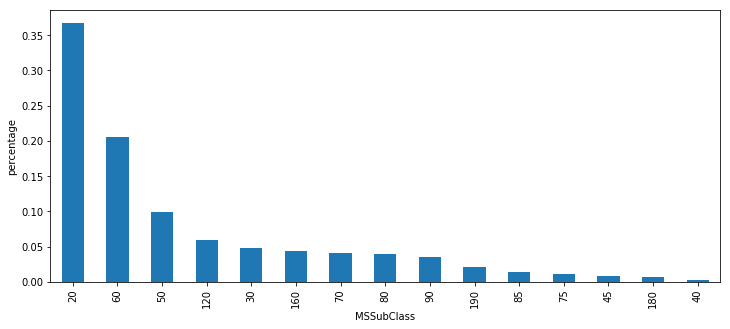

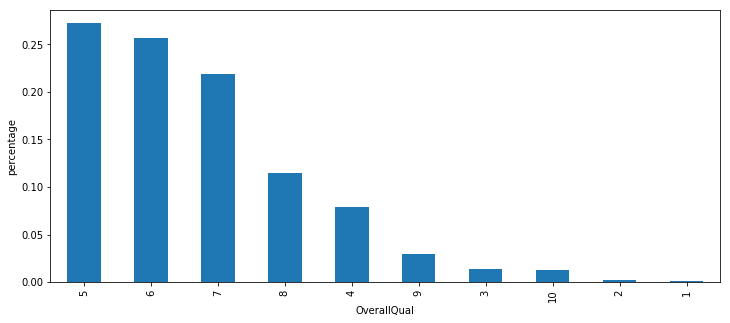

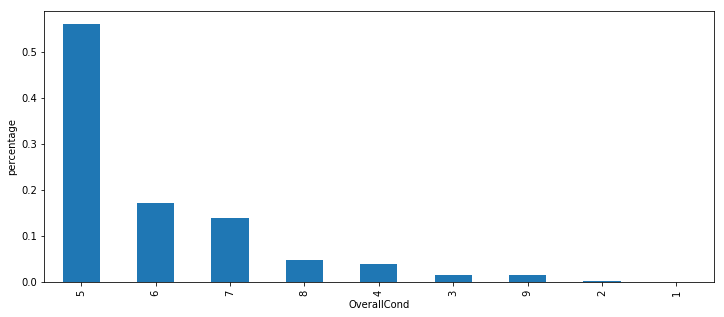

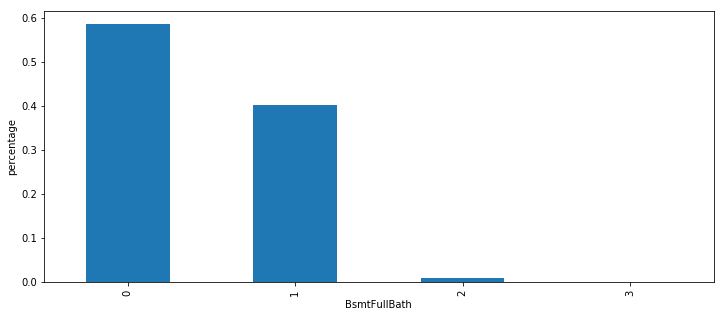

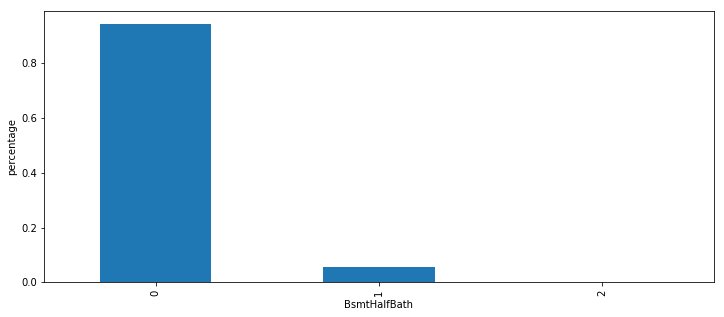

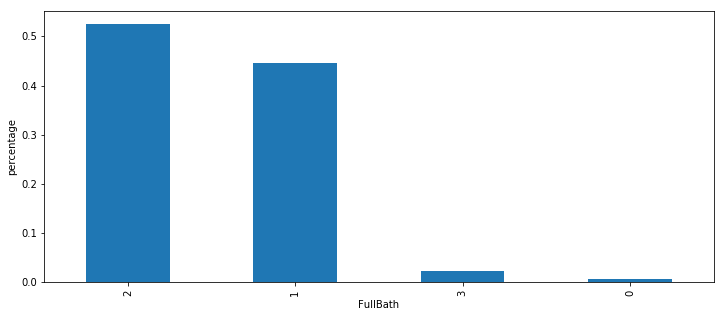

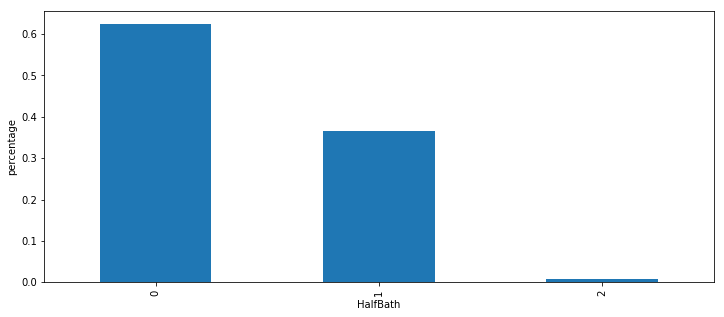

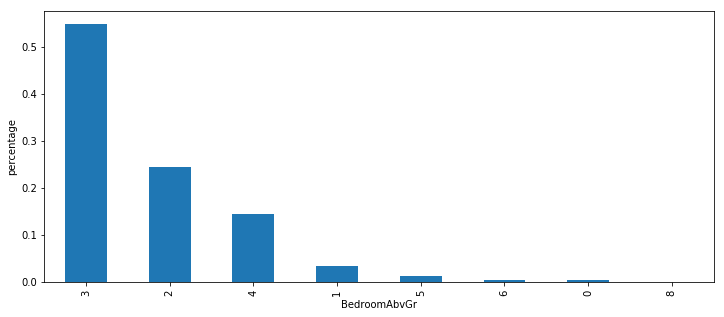

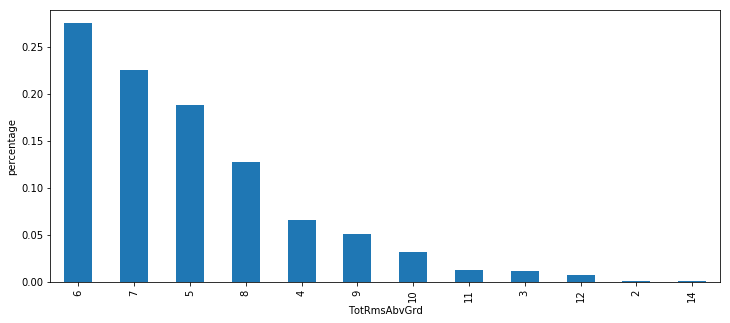

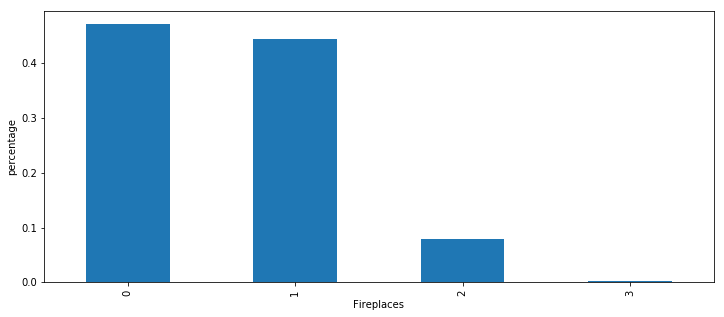

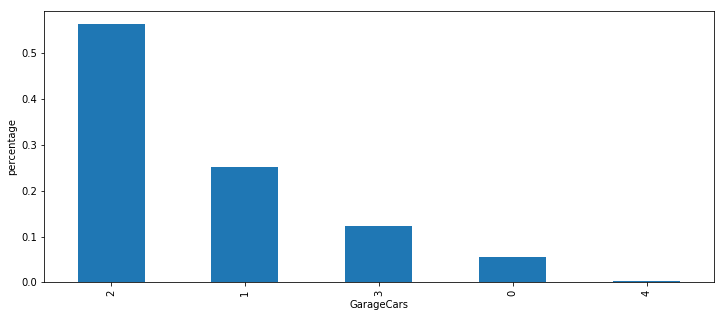

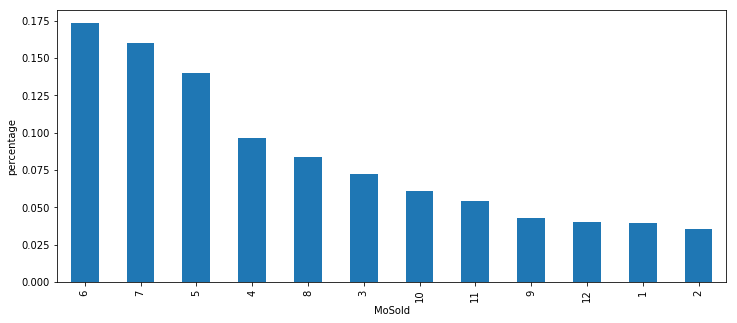

In [0]:
# Rare labels in other discrete variables

total = len(train)
cols_to_use = [col for col in discrete if col not in predcol_disc]
for col in cols_to_use:
  temp_df = pd.Series(train[col].value_counts()/total)
  plt.figure(figsize = (12,5))
  plt.subplot(1,1,1)
  fig = temp_df.sort_values(ascending=False).plot.bar()
  fig.set_xlabel(col)
  fig.set_ylabel('percentage')
  plt.show()
  

## Seperate data in to train and test

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train, train.SalePrice, test_size = 0.2, random_state = 0)

## Now its time to do our feature engineering



### 1.1 Create any new variables

In [0]:
     # # Lets create a variable called age_house which says what is age of house when its sold from its year of construction.

# X_train['age_house'] = X_train['YrSold'] - X_train['YearBuilt']

# # Lets create a variable which gives information about how many years back remodelling was done.

# X_train['when_remodel'] = X_train['YrSold'] - X_train['YearRemodAdd']

# # Create a variable which says how old is Garage

# X_train['age_garage'] = X_train['YrSold'] - X_train['GarageYrBlt']


def elapsed_years(df,var):
  df[var] = df['YrSold'] - df[var]
  return df
  
for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
  X_train = elapsed_years(X_train,var)
  X_test = elapsed_years(X_test,var)
  
## Removing YrSold variable as it is of not use now
X_train.drop('YrSold',axis = 1, inplace = True)
X_test.drop('YrSold',axis = 1, inplace = True)

new_var = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


### 1.2 a)Engineering missing values in numerical variables

In [0]:
year_vars.remove('YrSold')

for var in numerical+year_vars:
  if X_train[var].isna().mean() >0:
    print(var,X_train[var].isna().mean())



LotFrontage 0.1815068493150685
MasVnrArea 0.005136986301369863
GarageYrBlt 0.04965753424657534


For LotFrontage lets impute with median and create binary variable to capture missingness since missing data is present in more than 5% of observations. For MasVnrArea and GarageYrBlt lets impute with just median since missing data is present in less than 5% of observations

In [0]:
# add a variable indicating missingness and median imputation

for df in [X_train, X_test]:
  df['LotFrontage' + '_NA'] = np.where(df['LotFrontage'].isna(),1,0)
  df['LotFrontage' + '_median'] = df['LotFrontage'].fillna(X_train['LotFrontage'].median())
  
for df in [X_train, X_test]:
  for var in numerical+year_vars:  # Creating new variable for all numerical variables with _median ending.
    df[var + '_median'] = df[var].fillna(X_train[var].median())
    
numerical_median = list(X_train.columns[X_train.columns.str.endswith('_median')])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

### 1.2 b)Engineering missing values in categorical variables

In [0]:
# Lets see missing values in categorical variables
for var in categorical:
  if X_train[var].isna().sum() > 0:
    print(var,X_train[var].isna().mean())

Alley 0.9392123287671232
MasVnrType 0.005136986301369863
BsmtQual 0.023972602739726026
BsmtCond 0.023972602739726026
BsmtExposure 0.023972602739726026
BsmtFinType1 0.023972602739726026
BsmtFinType2 0.02482876712328767
Electrical 0.0008561643835616438
FireplaceQu 0.4717465753424658
GarageType 0.04965753424657534
GarageFinish 0.04965753424657534
GarageQual 0.04965753424657534
GarageCond 0.04965753424657534
PoolQC 0.9965753424657534
Fence 0.8167808219178082
MiscFeature 0.9580479452054794


Variables **Alley, PoolQC,MiscFeature** have majority of rows as missing(more than 90%). I will remove these variables. 

For other variables I will impute missing observations with new category called '**Missing**'. This will also takes care if missing data is not at random. But for now I will impute **Alley, PoolQC,MiscFeature**  variables also with Missing but anyways i am going to remove them after

In [0]:
# add label Missing
for df in [X_train,X_test]:
  for var in categorical:
    df[var + '_missing'] = df[var].fillna('Missing')
    
cat_missing = list(X_train.columns[X_train.columns.str.endswith('_missing')])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
# Check if there are any null values present

for var in X_train.columns:
  if X_train[var].isna().sum()>0:
    print(var, X_train[var].isna().mean())
print('next')    
    
for var in X_test.columns:
  if X_test[var].isna().sum()>0:
    print(var, X_test[var].isna().mean())

LotFrontage 0.1815068493150685
Alley 0.9392123287671232
MasVnrType 0.005136986301369863
MasVnrArea 0.005136986301369863
BsmtQual 0.023972602739726026
BsmtCond 0.023972602739726026
BsmtExposure 0.023972602739726026
BsmtFinType1 0.023972602739726026
BsmtFinType2 0.02482876712328767
Electrical 0.0008561643835616438
FireplaceQu 0.4717465753424658
GarageType 0.04965753424657534
GarageYrBlt 0.04965753424657534
GarageFinish 0.04965753424657534
GarageQual 0.04965753424657534
GarageCond 0.04965753424657534
PoolQC 0.9965753424657534
Fence 0.8167808219178082
MiscFeature 0.9580479452054794
next
LotFrontage 0.16095890410958905
Alley 0.9315068493150684
MasVnrType 0.00684931506849315
MasVnrArea 0.00684931506849315
BsmtQual 0.030821917808219176
BsmtCond 0.030821917808219176
BsmtExposure 0.03424657534246575
BsmtFinType1 0.030821917808219176
BsmtFinType2 0.030821917808219176
FireplaceQu 0.476027397260274
GarageType 0.07876712328767123
GarageYrBlt 0.07876712328767123
GarageFinish 0.07876712328767123
Gara

### 1.3) Outliers in Numeric variables

In [0]:
# Some numerical variables contains lots of zeros. As a result box plots shows all other values as outliers. So I will not feature engineer these variables 
#for outliers

numvar_lotzero = ['BsmtFinSF2_median','LowQualFinSF_median','EnclosedPorch_median','3SsnPorch_median','ScreenPorch_median','MiscVal_median']
numerical_out = [var for var in numerical_median if var not in numvar_lotzero]

def outlier_imp(var):
  IQR = X_train[var].quantile(0.75) - X_train[var].quantile(0.25)
  Upper_fence = X_train[var].quantile(0.75) + (IQR * 3)
  
  Lower_fence = X_train[var].quantile(0.75) - (IQR * 3)

  
  X_train[var + '_out'] = np.where(X_train[var] > Upper_fence, Upper_fence, X_train[var])
  X_train[var + '_out'] = np.where(X_train[var + '_out'] < Lower_fence, Lower_fence, X_train[var + '_out'])

  X_test[var + '_out'] = np.where(X_test[var] > Upper_fence, Upper_fence, X_test[var])
  X_test[var + '_out'] = np.where(X_test[var + '_out'] < Lower_fence, Lower_fence, X_test[var + '_out'])
 

num_conv_out = []
for var in numerical_out:
  outlier_imp(var)
  num_conv_out.append(var)
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

In [0]:
len(num_conv_out)

15

### 1.4) Engineering rare labels in categorical and discrete variables

In [0]:
def rare_imputation(variable):
  
  temp = X_train.groupby(variable)[variable].count()/np.float(len(X_train))
  frequency_cat = [x for x in temp.loc[temp > 0.05].index.values]
  
  X_train[variable + '_Rare'] = np.where(X_train[variable].isin(frequency_cat),X_train[variable],'Rare')
  X_test[variable + '_Rare'] = np.where(X_test[variable].isin(frequency_cat),X_test[variable],'Rare')  
  

In [0]:
cat_conv_rare = []
for var in cat_missing:
  rare_imputation(var)
  cat_conv_rare.append(var)
  
# Even though we engineered rare lables for Street ,Utilities, Condtion2, RoofMat1, Heating variables we will remove them as discussed before.

disc_conv_rare = []
for var in discrete:
  rare_imputation(var)
  disc_conv_rare.append(var)
  
# Even though we engineered rare lables for KitchenAbvGr and PoolArea variables we will remove them as discussed before.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


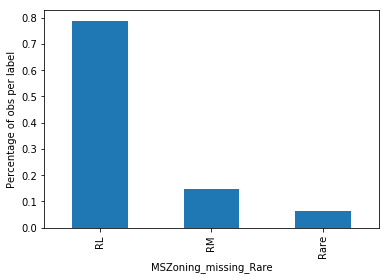

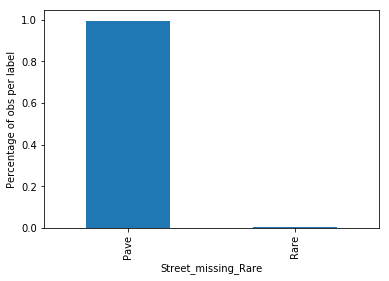

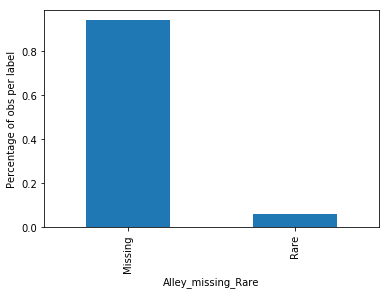

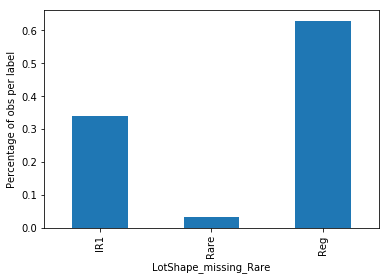

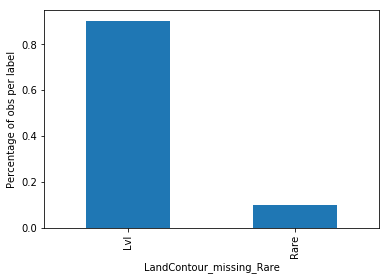

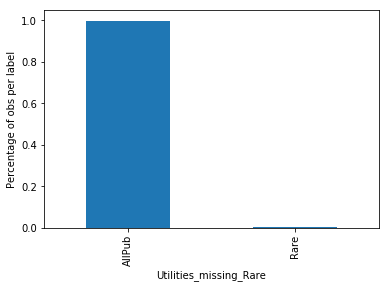

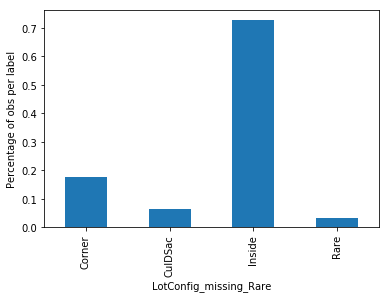

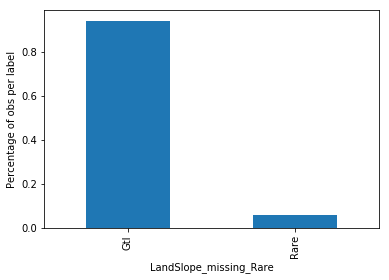

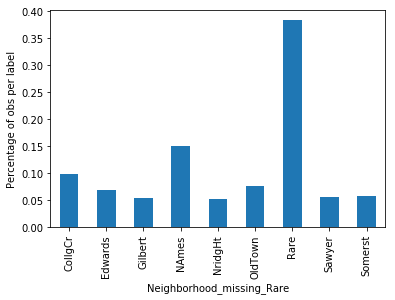

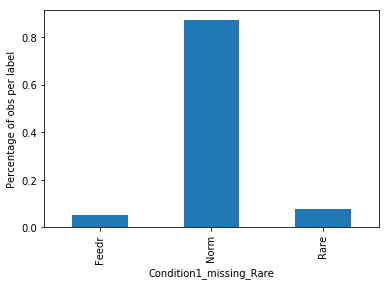

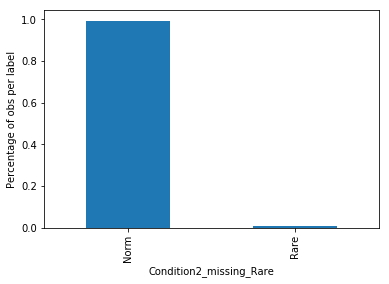

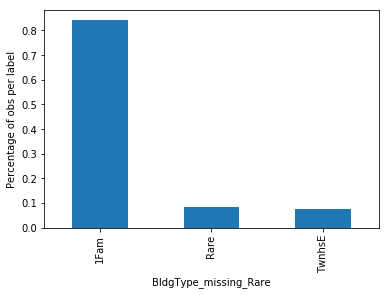

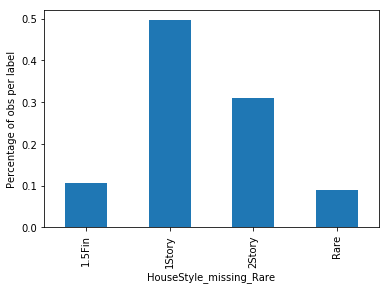

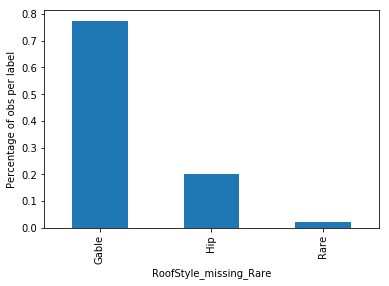

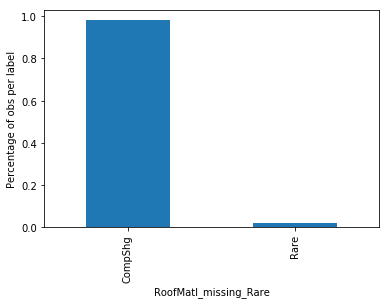

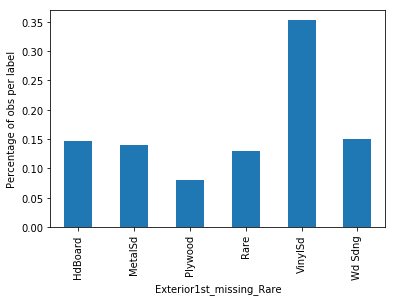

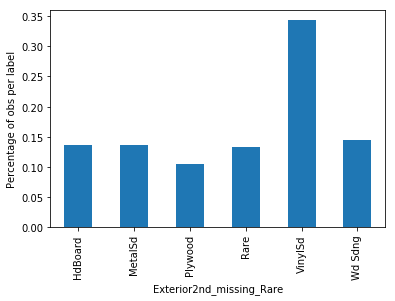

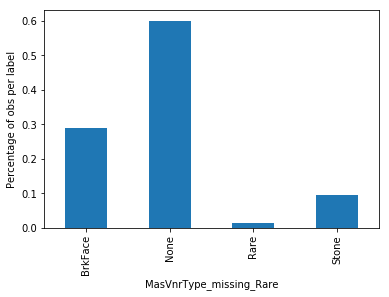

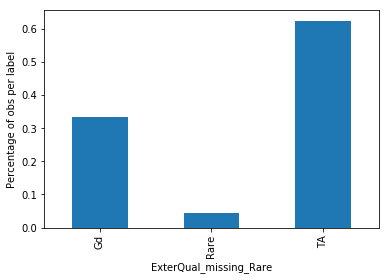

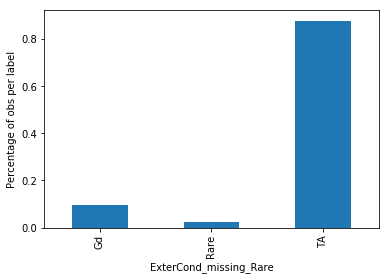

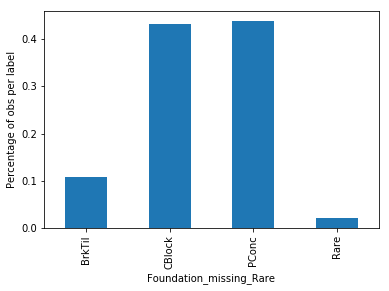

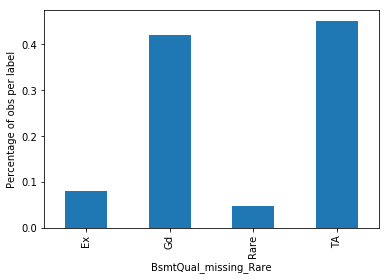

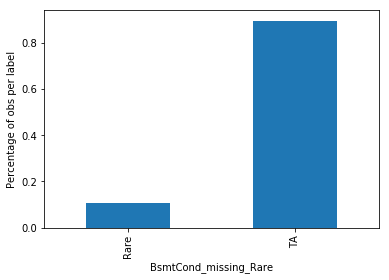

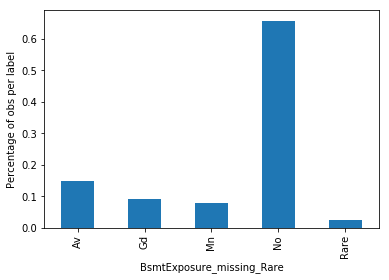

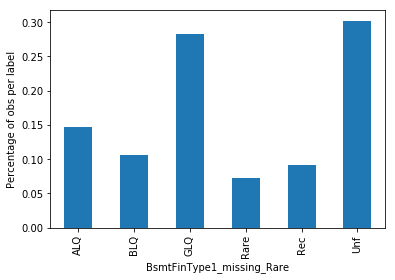

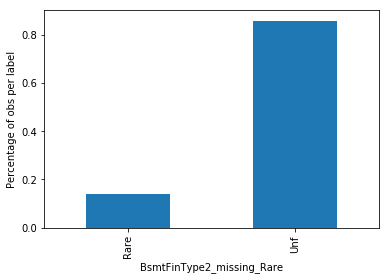

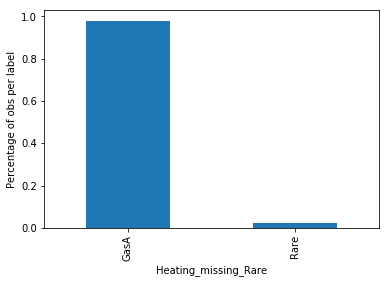

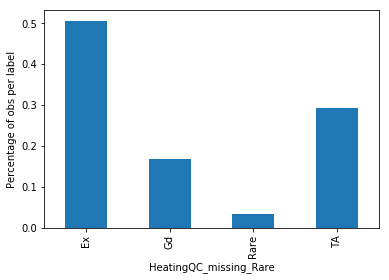

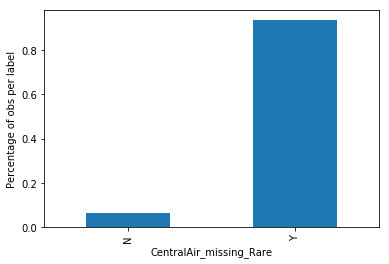

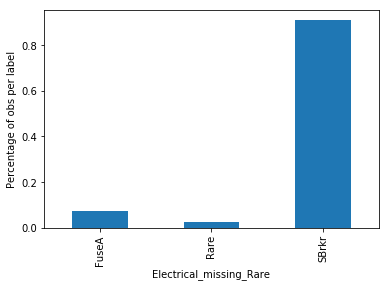

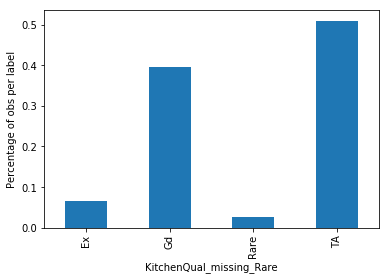

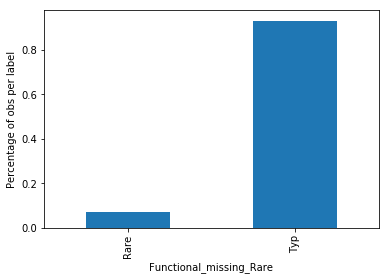

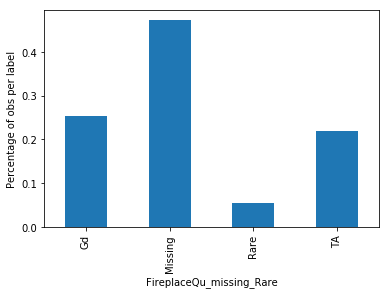

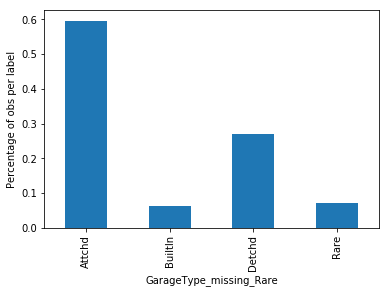

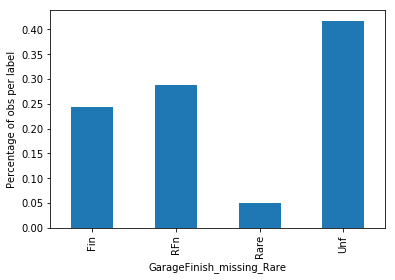

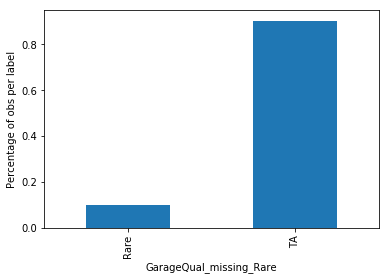

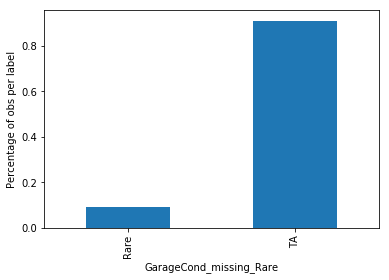

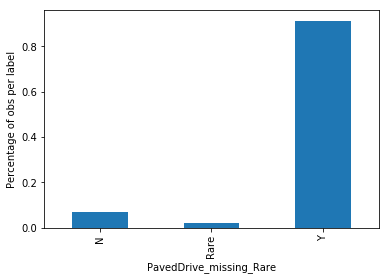

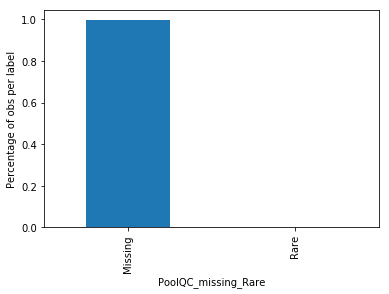

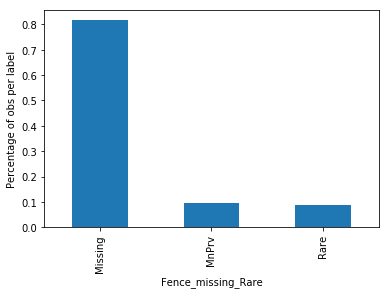

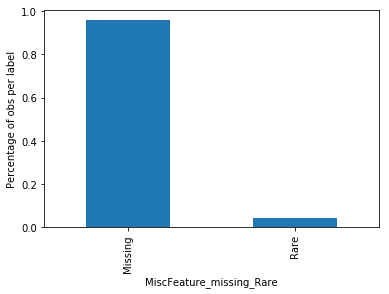

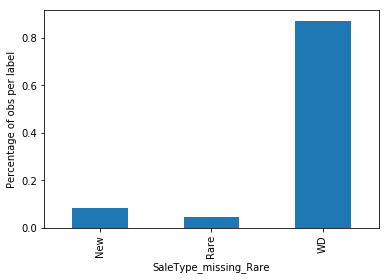

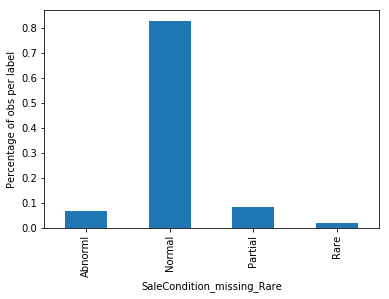

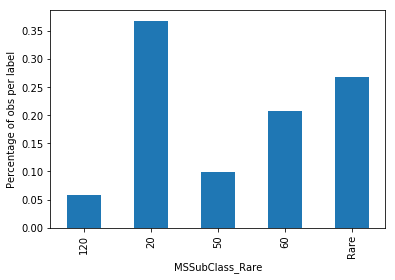

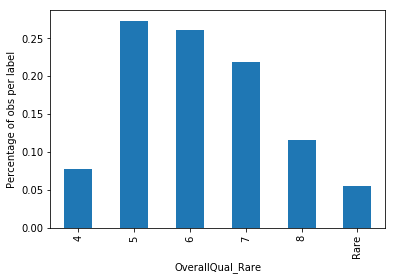

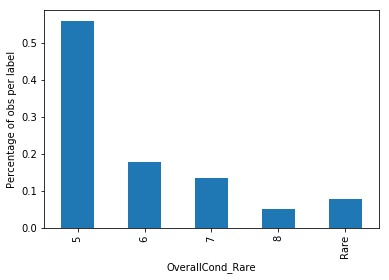

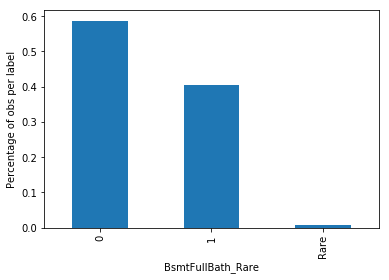

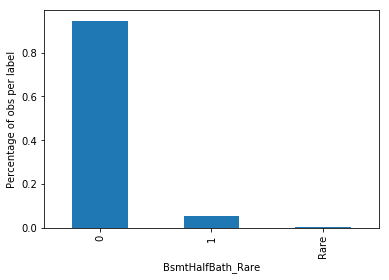

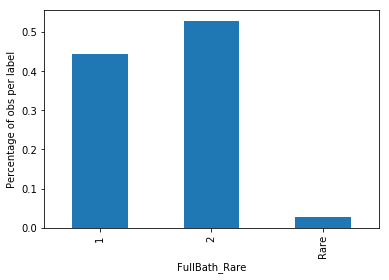

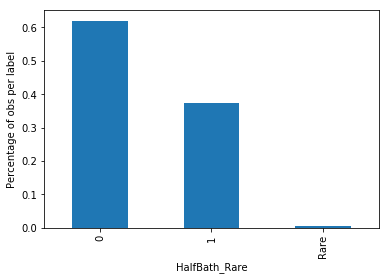

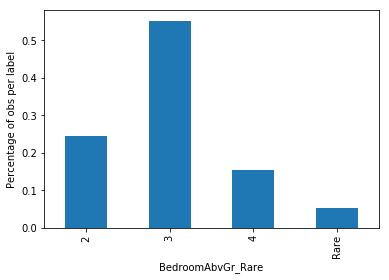

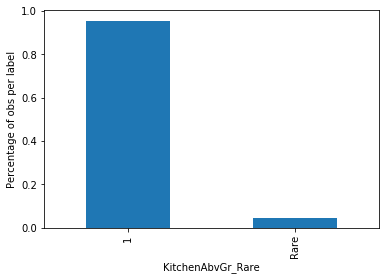

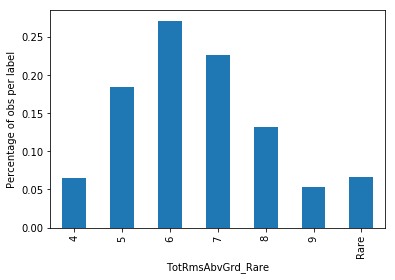

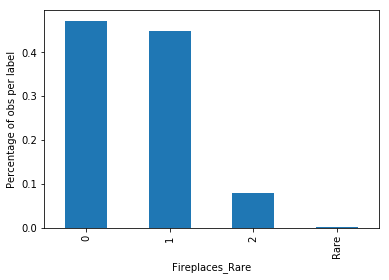

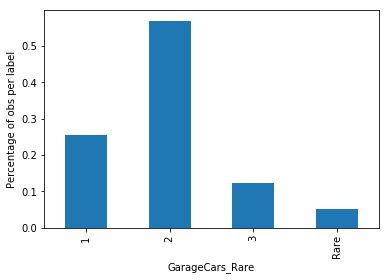

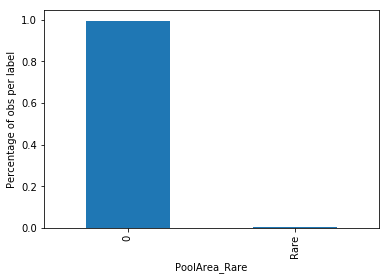

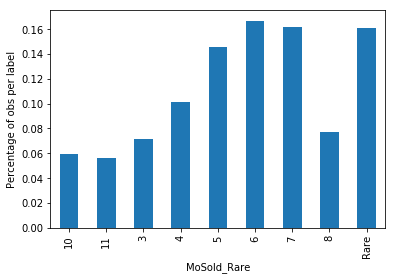

In [0]:
# Lets check whether we correctly engineered them
for var in X_train.columns[X_train.columns.str.endswith('_Rare')]:
  (X_train.loc[:,X_train.columns.str.endswith('_Rare')].groupby(var)[var].count()/len(X_train)).plot.bar()
  plt.ylabel('Percentage of obs per label')
  plt.xlabel(var)
  plt.show()

### 1.5) Encoding categorical and discrete variables

In [0]:
# Before that lets add new discrete and categorical variables to discrete and categorical list respectively
categorical = [var for var in X_train.columns if X_train[var].dtype == 'O']

discrete1 = discrete + list(X_train.columns[X_train.columns.str.endswith('_Rare')])

discrete = [var for var in discrete1 if var not in categorical]
               

So new variables generated from discrete variables became categorical because of presence of 'Rare' lable in them which is string. So now we have more categorical variables and 14 discrete variables

#### Target guided ordinal encoding

In [0]:
# Let's use mean of target to encode labels in categorical and discrete variables.

def encoding(var,target):
    ordered_labels = X_train.groupby([var])[target].mean().sort_values().index
    ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)}
    X_train[var] = X_train[var].map(ordinal_label)
    X_test[var] = X_test[var].map(ordinal_label)

In [0]:
for var in categorical:
  encoding(var,'SalePrice')
 

for var in discrete:
  encoding(var,'SalePrice')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Now lets look at what variables we have

In [0]:
#print(len(list(X_train_scaled.columns[X_train_scaled.columns.str.endswith('_Rare')])))

#print(len(list(X_train_scaled.columns[X_train_scaled.columns.str.endswith('_out')])))

#rem_cols = [var for var in train.columns if var not in num_conv_out + cat_conv_rare + disc_conv_rare + ['Id','SalePrice','YrSold']]
original_cols = [var for var in train.columns if var not in ['Id','SalePrice','YrSold']]
final_cols =  numvar_lotzero + list(X_train.columns[X_train.columns.str.endswith('_Rare')]) + list(X_train.columns[X_train.columns.str.endswith('_out')]) + list(X_train.columns[X_train.columns.str.endswith('_NA')])

In [0]:
print(len(final_cols))
print(len(original_cols))
#print(len(list(X_train.columns[X_train.columns.str.endswith('_out')])))
# #numerical_median+new_var
print(len(num_conv_out))
#len(numerical_median)

##### Problem in _out variables next do it.

#['BsmtFinSF2_median','LowQualFinSF_median','EnclosedPorch_median','3SsnPorch_median','ScreenPorch_median','MiscVal_median']

79
78
15


In [0]:
X_train[numerical_normal].head()

,LotFrontage_median_out,LotArea_median_out,MasVnrArea_median_out,BsmtFinSF1_median_out,BsmtUnfSF_median_out,TotalBsmtSF_median_out,1stFlrSF_median_out,2ndFlrSF_median_out,GrLivArea_median_out,GarageArea_median_out,WoodDeckSF_median_out,OpenPorchSF_median_out,YearBuilt_median_out,YearRemodAdd_median_out,GarageYrBlt_median_out
618,90.0,11694.0,452.0,48.0,1774.0,1822.0,1828.0,0.0,1828.0,774.0,0.0,108.0,0.0,0.0,0.0
870,60.0,6600.0,0.0,0.0,894.0,894.0,894.0,0.0,894.0,308.0,0.0,0.0,47.0,47.0,47.0
92,80.0,13360.0,0.0,713.0,163.0,876.0,964.0,0.0,964.0,432.0,0.0,0.0,88.0,3.0,88.0
817,69.0,13265.0,148.0,1218.0,350.0,1568.0,1689.0,0.0,1689.0,857.0,150.0,59.0,6.0,6.0,6.0
302,118.0,13704.0,150.0,0.0,1541.0,1541.0,1541.0,0.0,1541.0,843.0,468.0,81.0,5.0,4.0,5.0


### 1.7) Transforming numerical variables to make them normal

In [0]:
numerical_normal =  list(X_train.columns[X_train.columns.str.endswith('_out')])  # Variables which can be tranformed to make them normal


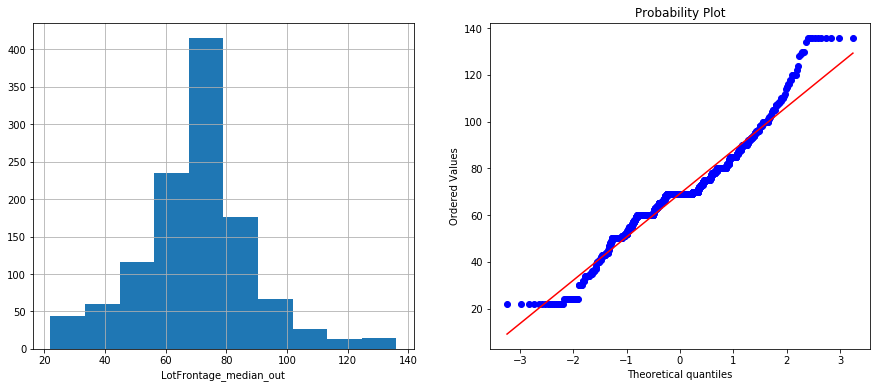

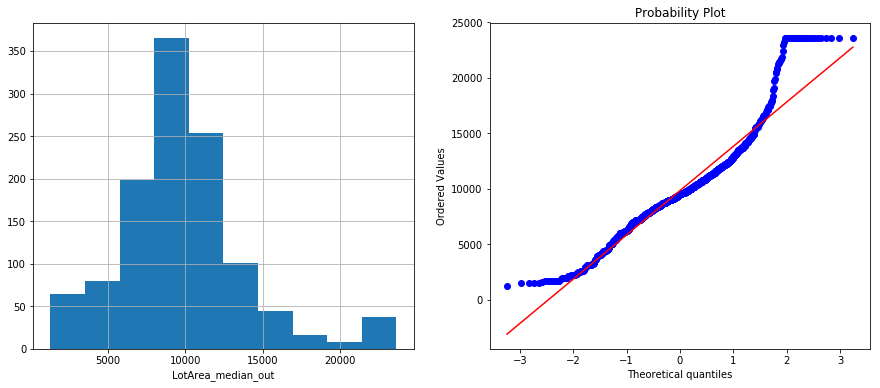

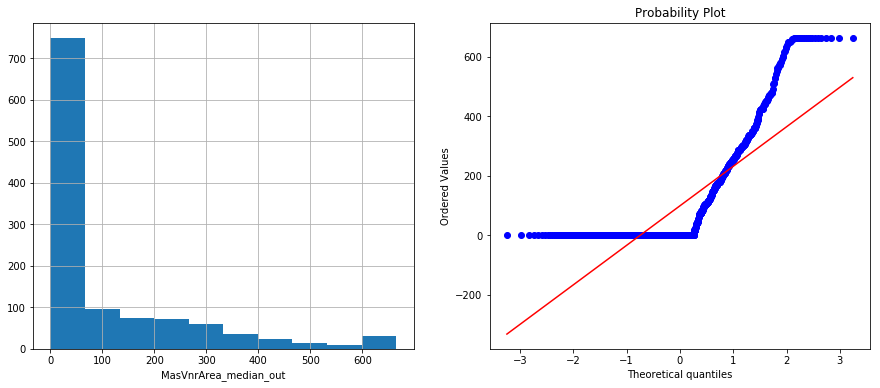

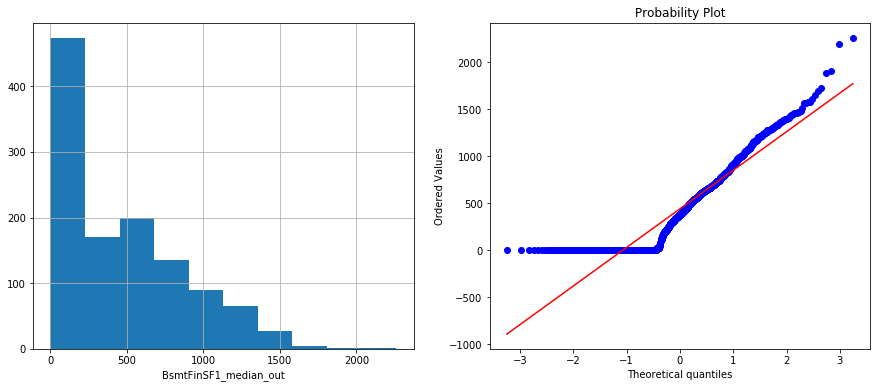

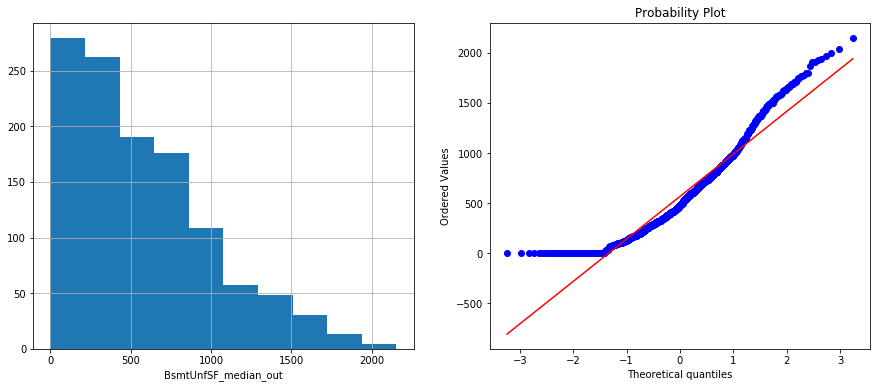

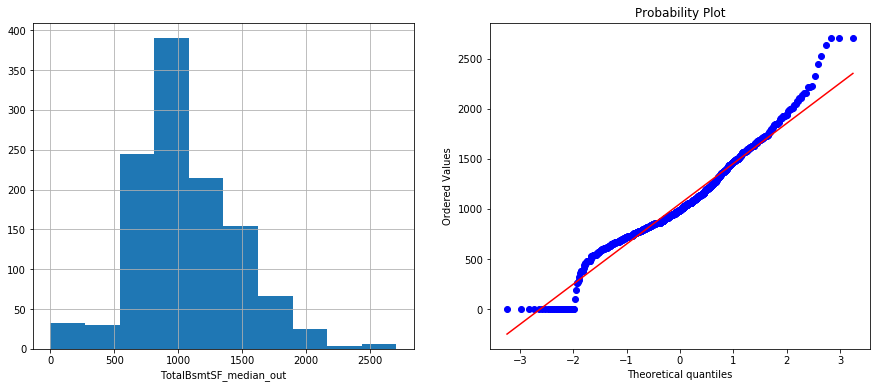

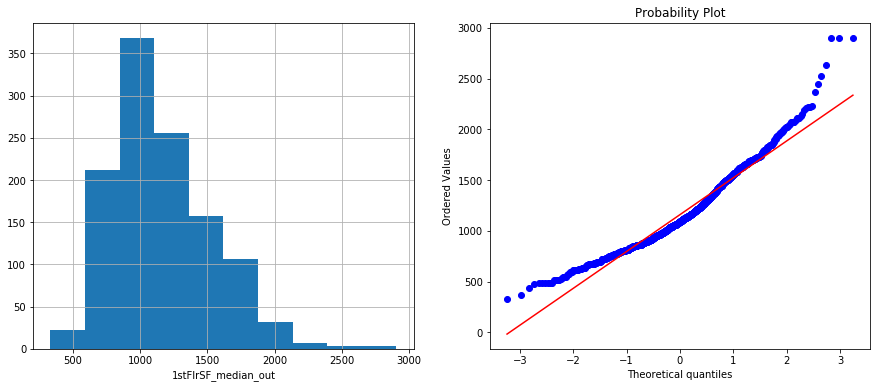

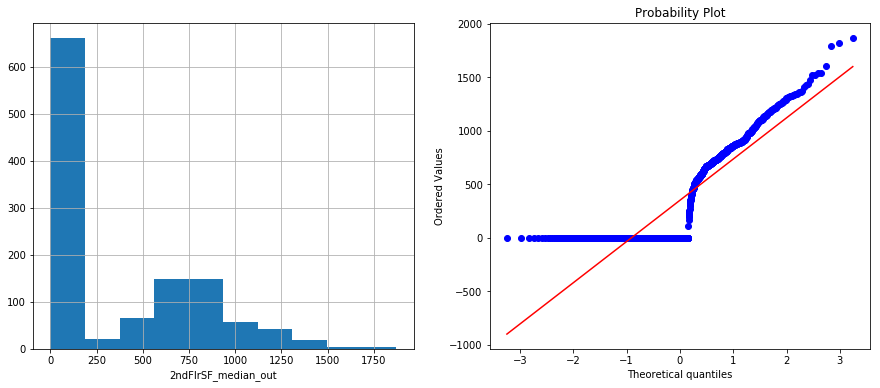

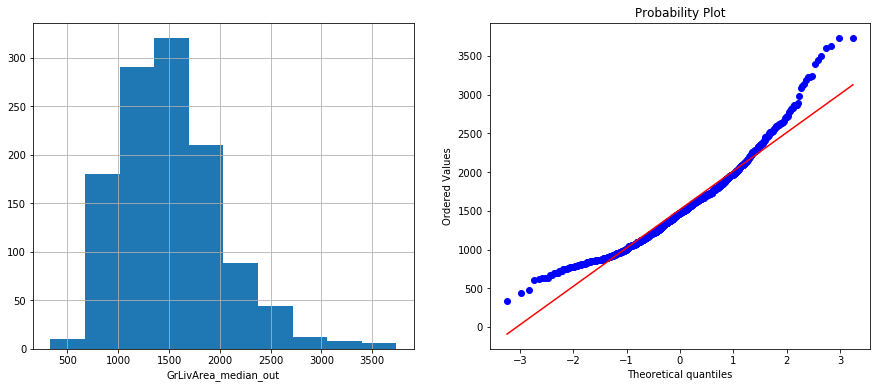

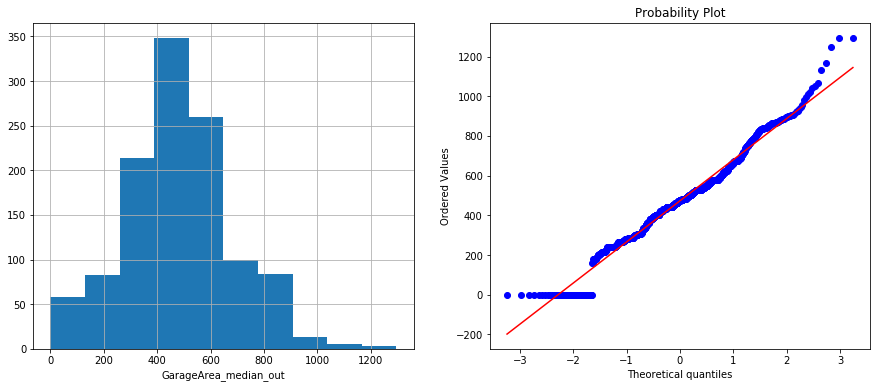

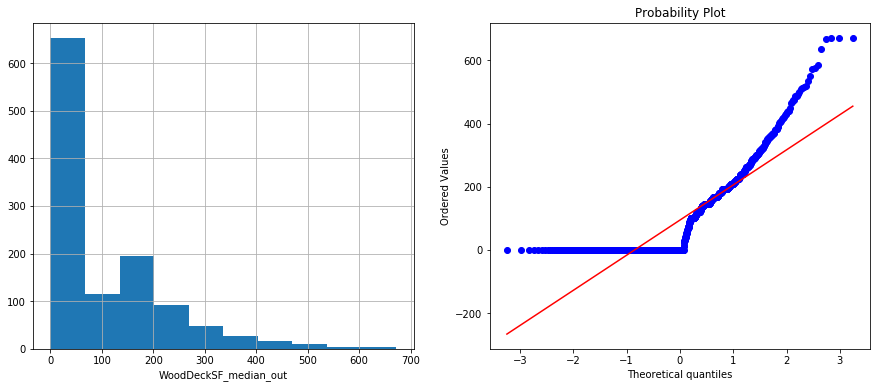

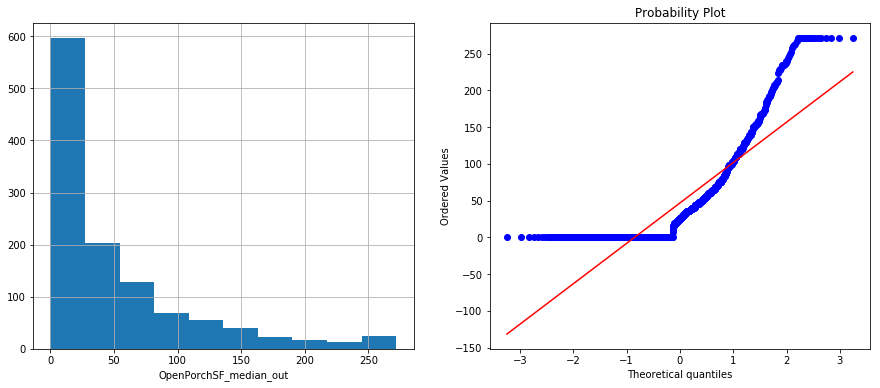

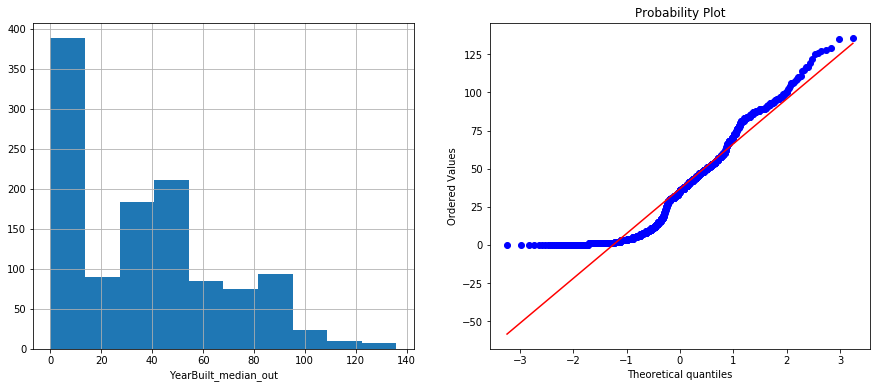

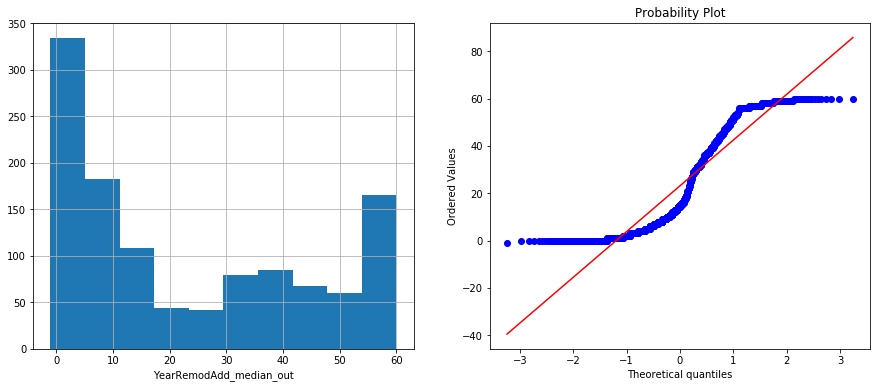

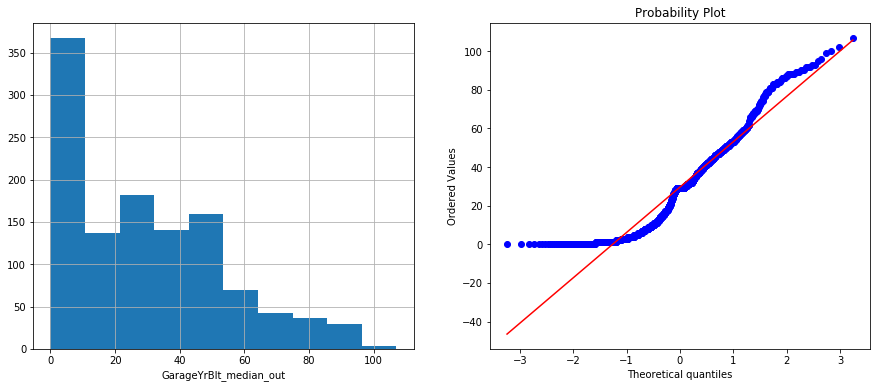

In [0]:
# Lets see distribution of original numerical variables

def diagnostic_plots(df,variable):
  #function to plot a histogram and a Q-Q plot
  #Side by side, for a certain variable
  
  plt.figure(figsize = (15,6))
  plt.subplot(1,2,1)
  df[variable].hist()
  plt.xlabel(variable)

  
  plt.subplot(1,2,2)
  stats.probplot(df[variable], dist = 'norm', plot = pylab)
  
  plt.show()
  
  
for var in numerical_normal:
  diagnostic_plots(X_train,var)

LotFrontage_median_out


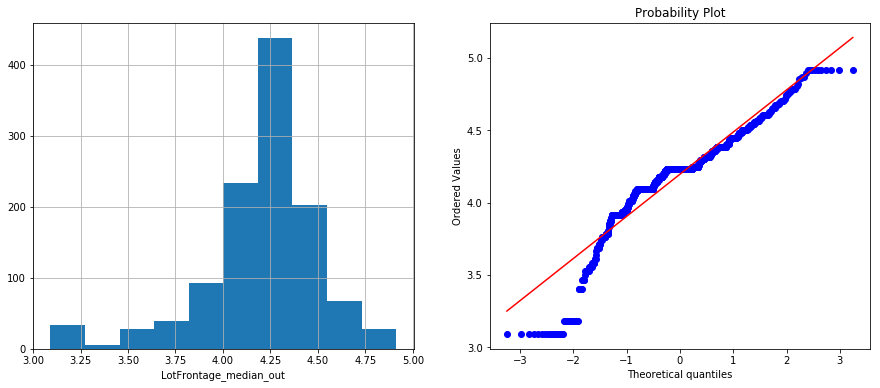

LotArea_median_out


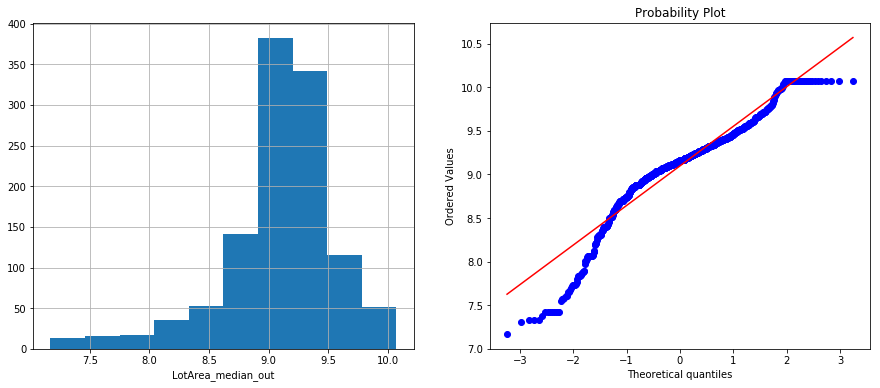

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


ValueError: ignored

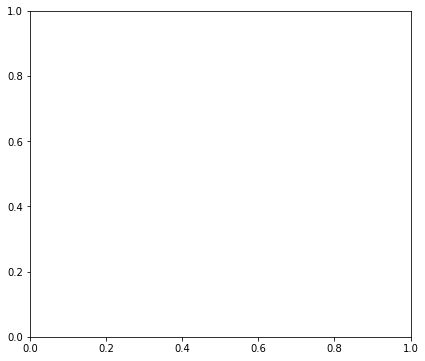

In [0]:
# for var in numerical_total:
#   X_train_scaled[var], param = stats.boxcox(X_train_scaled[var])
#   X_test_scaled[var], param = stats.boxcox(X_test_scaled[var])
#   diagnostic_plots(X_train_scaled, var)

# Lets see distribution of log transformed numerical variables

def diagnostic_plots(df,variable):
  #function to plot a histogram and a Q-Q plot
  #Side by side, for a certain variable
  
  plt.figure(figsize = (15,6))
  plt.subplot(1,2,1)
  np.log(df[variable]).hist()
  plt.xlabel(variable)

  
  plt.subplot(1,2,2)
  stats.probplot(np.log(df[variable]), dist = 'norm', plot = pylab)
  print(variable)
  plt.show()
  
  
for var in numerical_normal:
  diagnostic_plots(X_train,var)


Clearly we can see most of variables are not guassian. ML algorithms benefit from having guassian distribution.

In [0]:
for var in numerical_total:
  X_train_scaled[var] = np.log(X_train_scaled[var])
  X_test_scaled[var] = np.log(X_test_scaled[var])


### 1.6) Feature Scaling

#### final_cols are the ones which we need to scale

In [0]:
#fit scalar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[final_cols])
X_test_scaled = scaler.transform(X_test[final_cols])

X_train_scaled = pd.DataFrame(X_train_scaled,index = X_train.index,columns = X_train[final_cols].columns)
X_test_scaled = pd.DataFrame(X_test_scaled,index = X_test.index,columns = X_test[final_cols].columns)


### We have to do variable transformation before scaling the variables

## 2) Now its time to do feature selection 

In [0]:
print(len(final_cols))
print(len(original_cols))

67
64


In [0]:
# We decided to drop some varibles based on analysis we have done so far

del_vars = ['KitchenAbvGr','PoolArea','Street','Utilities','Condition2','RoofMatl','Heating','Alley','PoolQC','MiscFeature',
            'KitchenAbvGr_Rare','PoolArea_Rare','Street_missing_Rare','Utilities_missing_Rare','Condition2_missing_Rare','RoofMatl_missing_Rare',
            'Heating_missing_Rare','Alley_missing_Rare','PoolQC_missing_Rare','MiscFeature_missing_Rare']

original_cols = [var for var in original_cols if var not in del_vars]
final_cols = [var for var in final_cols if var not in del_vars]


In [0]:
print(len(final_cols))
print(len(original_cols))

67
64


In [0]:
# Lets see if we have any constant features using 'original_cols'

# sel = VarianceThreshold(threshold = 0)
# sel.fit(X_train[original_cols])

# print(sum(sel.get_support()))


# Lets see if we have any constant features using 'final_cols'

sel = VarianceThreshold(threshold = 0)
sel.fit(X_train_scaled[final_cols])

print(sum(sel.get_support()))


69


Seems like we dont have any constant variables in our dataset

In [0]:
# Lets see if we have any Quasi constant features using 'original_cols'

# sel = VarianceThreshold(threshold=0.05) #0.05 indicates 95% observations with same value
# sel.fit(X_train_scaled[original_cols])

# print(sum(sel.get_support()))

# Lets see if we have any Quasi constant features using 'final_cols'

sel = VarianceThreshold(threshold = 0.05)
sel.fit(X_train_scaled[final_cols])

print(sum(sel.get_support()))



69


Seems like we dont have any Quasi constant variables in our dataset

### 2.1) Feature selection using correlation

Correlation Feature Selection evaluates subsets of features on basis of following hypothesis: 'Good feature subsets contain features highly correlated with the target, yet uncorrelated to each other'.

In [0]:
# Build a dataframne with correlation b/n features.

corrmat = X_train_scaled[final_cols].corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending = False)
corrmat = corrmat[corrmat >= 0.8]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat

,feature1,feature2,corr
0,Exterior1st_missing_Rare,Exterior2nd_missing_Rare,0.918481
1,Exterior2nd_missing_Rare,Exterior1st_missing_Rare,0.918481
2,GarageCars_Rare,GarageArea_median_out,0.863404
3,GarageArea_median_out,GarageCars_Rare,0.863404


In [0]:
corrmat = X_train[original_cols].corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending = False)
corrmat = corrmat[corrmat >= 0.8]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat

,feature1,feature2,corr
0,Exterior2nd,Exterior1st,0.901467
1,Exterior1st,Exterior2nd,0.901467
2,GarageCars,GarageArea,0.868341
3,GarageArea,GarageCars,0.868341
4,GarageYrBlt,YearBuilt,0.823634
5,YearBuilt,GarageYrBlt,0.823634
6,GrLivArea,TotRmsAbvGrd,0.819614
7,TotRmsAbvGrd,GrLivArea,0.819614


 Will remove variables where we have high correlation(>80%)

In [0]:
final_cols = [var for var in final_cols if var not in ['Exterior2nd_missing_Rare','GarageCars_Rare']]
original_cols = [var for var in original_cols if var not in ['Exterior2nd','GarageCars','TotRmsAbvGrd','GarageYrBlt']]

In [0]:
X_train_scaled[final_cols] = X_train_scaled[final_cols].replace([np.inf, -np.inf], np.nan)
X_test_scaled[final_cols] = X_test_scaled[final_cols].replace([np.inf, -np.inf], np.nan)

X_train_scaled[final_cols] = X_train_scaled[final_cols].fillna(0)
X_test_scaled[final_cols] = X_test_scaled[final_cols].fillna(0)


In [0]:
print(len(final_cols))
print(len(original_cols))

67
64


### Lets start modelling

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [0]:
# Create linear regression object and do for 'final_cols'
regr = linear_model.LinearRegression()

regr.fit(X_train_scaled[final_cols],y_train)

y_pred = regr.predict(X_test_scaled[final_cols])

# The mean squared error
print("Root Mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, y_pred)))
#mean_squared_error(y_train, np.exp(pred)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Root Mean squared error: 39666.03
Variance score: 0.77


In [0]:
X_train[original_cols] = X_train[original_cols].replace([np.inf, -np.inf], np.nan)
X_test[original_cols] = X_test[original_cols].replace([np.inf, -np.inf], np.nan)

X_train[original_cols] = X_train[original_cols].fillna(0)
X_test[original_cols] = X_test[original_cols].fillna(0)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [0]:
# Create linear regression object and do for 'original_cols'
regr = linear_model.LinearRegression()

regr.fit(X_train[original_cols],y_train)

y_pred = regr.predict(X_test[original_cols])

# The mean squared error
print("Root Mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, y_pred)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Root Mean squared error: 46407.39
Variance score: 0.69


We can clearly see preprocessed columns are doing better by looking at Root mean squared error.

Now lets plot learning curves to see what problems our model is having. Learning curves gives clear picture of whether our model is having bias or variance problem.

In [0]:
# Learning curves
i = 0
j = 0
X_train_temp = pd.DataFrame()
mean_squared_error_train = []
mean_squared_error_test = []
x = []
while X_train_temp.shape[0] <= 1150:
  X_train_temp = X_train_scaled[i:j+50]
  y_train_temp = y_train[i:j+50]
  X_test_temp = X_test_scaled[i:j+50]
  y_test_temp = y_test[i:j+50]
  
  #print(X_train[final_cols].shape)
  #print(y_train.shape)
  regr = linear_model.LinearRegression()
  
  regr.fit(X_train_temp[final_cols],y_train_temp)
  y_pred_train = regr.predict(X_train_temp[final_cols])
  y_pred_test = regr.predict(X_test_temp[final_cols])
  
  
  rmse_train = sqrt(mean_squared_error(y_train_temp, y_pred_train))
  rmse_test = sqrt(mean_squared_error(y_test_temp, y_pred_test))

  
  mean_squared_error_train.append(rmse_train)
  mean_squared_error_test.append(rmse_test)
  x.append(j+50)
  
  j = j + 50


In [0]:
learning_curve = pd.DataFrame(list(zip(x[:-1],mean_squared_error_train,mean_squared_error_test)),columns = ['Number of records','Training error','Testing error'])

#### Lets plot learning curves to see whether our model is having bias or variance problem

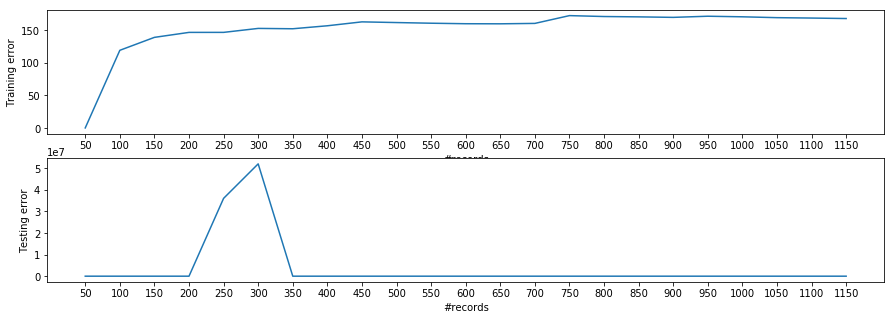

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,5))

learning_curve['Number of records'] = learning_curve['Number of records'].astype('category').astype('str')

plt.subplot(2,1,1)
plt.plot(learning_curve['Number of records'],np.sqrt(learning_curve['Training error']))
plt.ylabel('Training error')
plt.xlabel('#records')

plt.subplot(2,1,2)
plt.plot(learning_curve['Number of records'],np.sqrt(learning_curve['Testing error']))
plt.ylabel('Testing error')
plt.xlabel('#records')
plt.show()
#plt.legend(prop={'size': 10})


By looking at Learning curves and both training and testing errors we can come to conclusion that model is suffering from high bias problem. In bias  both training and validation errors flatten out after some time and they will be very close as number of traning examples increases.

In [0]:
# import matplotlib.pyplot as plt
# fig = plt.figure(figsize=(15,5))

# ax1 = fig.add_subplot(1,1,1)

# learning_curve['Number of records'] = learning_curve['Number of records'].astype('category').astype('str')
# ax1.plot(learning_curve['Number of records'],learning_curve['Training error'])
# ax1.set_xticklabels(list(learning_curve['Number of records']), rotation = 'vertical')
# ax1.set_ylabel('Training error',fontsize = 40)
# ax1.set_xlabel('# records',fontsize = 20)
# plt.setp(ax1.get_yticklabels(), fontsize=40)
# plt.setp(ax1.get_xticklabels(), fontsize=25)
# ax1.legend(prop={'size': 10})

# color1 = 'deeppink'
# ax2 = ax1.twinx()
# plt.figure(figsize=(35,15))
# ax2.set_ylabel('Testing error', fontsize = 50)
# ax2.plot(learning_curve['Number of records'],learning_curve['Testing error'],color = color1)
# plt.setp(ax2.get_yticklabels(), fontsize=40)
# ax2.legend(prop={'size': 10},loc = 'lower right')
# fig.tight_layout()
# plt.show()

### Since we are having bias problem lets build an algorithm which will reduce this. We will try Adaboost regressor.

In [0]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import math

In [0]:
max_depth = [int(x) for x in np.linspace(1, 30, num = 30)]
n_estimators = list(range(10,1000,50))
learning_rate = [0.01,0.05,0.1,0.3,1]

param_grid = {'n_estimators' : n_estimators,
              'base_estimator__max_depth' : max_depth,
             'learning_rate':learning_rate,
             'loss' : ['linear', 'square', 'exponential']}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
DTC = DecisionTreeRegressor(random_state = 11)
ABC = AdaBoostRegressor(base_estimator = DTC)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = ABC, param_distributions = param_grid, n_iter = 10, cv = 3, verbose=2, random_state=11, n_jobs = -1, 
                               scoring = 'neg_mean_squared_error')
# Fit the random search model
rf_random.fit(X_train_scaled[final_cols],y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.6min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                                                    max_depth=None,
                                                                                    max_features=None,
                                                                                    max_leaf_nodes=None,
                                                                                    min_impurity_decrease=0.0,
                                                                                    min_impurity_split=None,
                                                                                    min_samples_leaf=1,
                                                                                    min_samples_split=2,
                                                                                    min_weight_fraction_

In [0]:
rf_random.best_params_

{'base_estimator__max_depth': 13,
 'learning_rate': 1,
 'loss': 'square',
 'n_estimators': 210}

In [0]:
y_pred = rf_random.best_estimator_.predict(X_test_scaled[final_cols])

print("Root Mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, y_pred)))


Root Mean squared error: 26790.57


In [0]:
regr = AdaBoostRegressor(DecisionTreeRegressor(max_depth=13),random_state=11, learning_rate =  1,loss = 'square', n_estimators =  210)
regr.fit(X_train_scaled[final_cols],y_train)

y_pred_test = regr.predict(X_test_scaled[final_cols])
y_pred_train = regr.predict(X_train_scaled[final_cols])


print("Root Mean squared error test: %.2f"
      % sqrt(mean_squared_error(y_test, y_pred_test)))

print("Root Mean squared error train: %.2f"
      % sqrt(mean_squared_error(y_train, y_pred_train)))

Root Mean squared error test: 26299.33
Root Mean squared error train: 9424.66


Lets plot learning curves

In [0]:
# Learning curves
i = 0
j = 0
X_train_temp = pd.DataFrame()
mean_squared_error_train = []
mean_squared_error_test = []
x = []
while X_train_temp.shape[0] <= 1150:
  X_train_temp = X_train_scaled[i:j+50]
  y_train_temp = y_train[i:j+50]
  X_test_temp = X_test_scaled[i:j+50]
  y_test_temp = y_test[i:j+50]
  
  #print(X_train_temp[final_cols].shape)
  #print(y_train.shape)
  regr = AdaBoostRegressor(DecisionTreeRegressor(max_depth=13),random_state=11, learning_rate =  1,loss = 'square', n_estimators =  210)
  
  regr.fit(X_train_temp[final_cols],y_train_temp)
  y_pred_train = regr.predict(X_train_temp[final_cols])
  y_pred_test = regr.predict(X_test_temp[final_cols])
  
  
  rmse_train = sqrt(mean_squared_error(y_train_temp, y_pred_train))
  rmse_test = sqrt(mean_squared_error(y_test_temp, y_pred_test))

  
  mean_squared_error_train.append(rmse_train)
  mean_squared_error_test.append(rmse_test)
  x.append(j+50)
  
  j = j + 50
  

learning_curve = pd.DataFrame(list(zip(x[:-1],mean_squared_error_train,mean_squared_error_test)),columns = ['Number of records','Training error','Testing error'])


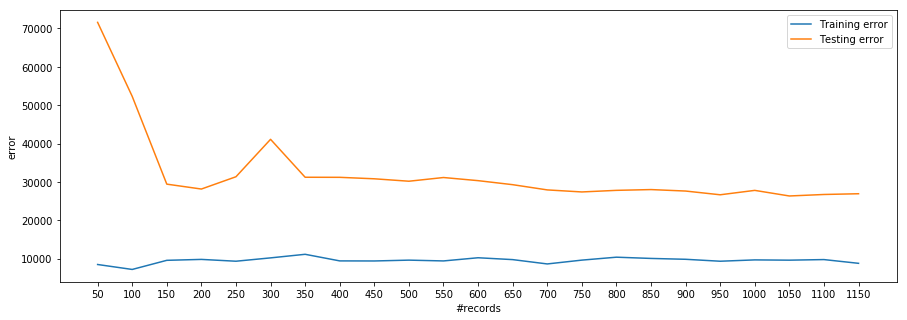

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,5))

learning_curve['Number of records'] = learning_curve['Number of records'].astype('category').astype('str')

plt.plot(learning_curve['Number of records'],learning_curve['Training error'])
plt.plot(learning_curve['Number of records'],learning_curve['Testing error'])

plt.ylabel('error')
plt.xlabel('#records')
plt.legend()

#plt.legend(prop={'size': 10})

We can see that from above graphs we decreased bias a lot but doing so we also increased variance problem. 

### Lets build Random forest regressor

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV


In [0]:
regr = RandomForestRegressor(random_state=0, n_estimators=100)
regr.fit(X_train_scaled[final_cols],y_train)

y_pred = regr.predict(X_test_scaled[final_cols])

print("Root Mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, y_pred)))

Root Mean squared error: 31598.38


In [0]:
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
n_estimators = list(range(100,2001,100))

param_grid = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
             'max_features': ['auto', 'sqrt'],
              'min_samples_leaf' : [1, 2, 4, 10]}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_scaled[final_cols],y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.0min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [0]:
rf_random.best_params_

{'max_depth': 80,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 700}

In [0]:
y_pred = rf_random.best_estimator_.predict(X_test_scaled[final_cols])

print("Root Mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, y_pred)))



Root Mean squared error: 31252.68


In [0]:
regr = RandomForestRegressor(random_state=42, n_estimators=800, max_depth=10, max_features = 'auto')
regr.fit(X_train_scaled[final_cols],y_train)

y_pred_test = regr.predict(X_test_scaled[final_cols])
y_pred_train = regr.predict(X_train_scaled[final_cols])


print("Root Mean squared error test: %.2f"
      % sqrt(mean_squared_error(y_test, y_pred_test)))

print("Root Mean squared error train: %.2f"
      % sqrt(mean_squared_error(y_train, y_pred_train)))

Root Mean squared error test: 31473.91
Root Mean squared error train: 11893.32


In [0]:
# Learning curves
i = 0
j = 0
X_train_temp = pd.DataFrame()
mean_squared_error_train = []
mean_squared_error_test = []
x = []
while X_train_temp.shape[0] <= 1150:
  X_train_temp = X_train_scaled[i:j+50]
  y_train_temp = y_train[i:j+50]
  X_test_temp = X_test_scaled[i:j+50]
  y_test_temp = y_test[i:j+50]
  
  print(X_train_temp[final_cols].shape)
  #print(y_train.shape)
  regr = RandomForestRegressor(random_state=42, n_estimators=1000, max_depth=60)
  
  regr.fit(X_train_temp[final_cols],y_train_temp)
  y_pred_train = regr.predict(X_train_temp[final_cols])
  y_pred_test = regr.predict(X_test_temp[final_cols])
  
  
  rmse_train = sqrt(mean_squared_error(y_train_temp, y_pred_train))
  rmse_test = sqrt(mean_squared_error(y_test_temp, y_pred_test))

  
  mean_squared_error_train.append(rmse_train)
  mean_squared_error_test.append(rmse_test)
  x.append(j+50)
  
  j = j + 50
  

learning_curve = pd.DataFrame(list(zip(x[:-1],mean_squared_error_train,mean_squared_error_test)),columns = ['Number of records','Training error','Testing error'])


(50, 67)
(100, 67)
(150, 67)
(200, 67)
(250, 67)
(300, 67)
(350, 67)
(400, 67)
(450, 67)
(500, 67)
(550, 67)
(600, 67)
(650, 67)
(700, 67)
(750, 67)
(800, 67)
(850, 67)
(900, 67)
(950, 67)
(1000, 67)
(1050, 67)
(1100, 67)
(1150, 67)
(1168, 67)


In [0]:
learning_curve

,Number of records,Training error,Testing error
0,50,10345.189646,76582.609147
1,100,11412.395273,53062.703096
2,150,12924.704444,36142.038914
3,200,12123.431332,31945.522257
4,250,11602.362472,31240.818228
5,300,12160.947928,40924.389474
6,350,14055.068807,36659.066728
7,400,13826.864059,36304.985652
8,450,13525.447972,34873.541275
9,500,12958.069746,33839.468082


In [0]:
# import matplotlib.pyplot as plt
# fig = plt.figure(figsize=(15,5))

# learning_curve['Number of records'] = learning_curve['Number of records'].astype('category').astype('str')

# plt.subplot(2,1,1)
# plt.plot(learning_curve['Number of records'],learning_curve['Training error'])
# plt.ylabel('Training error')
# plt.xlabel('#records')

# plt.subplot(2,1,2)
# plt.plot(learning_curve['Number of records'],learning_curve['Testing error'])
# plt.ylabel('Testing error')
# plt.xlabel('#records')
# plt.show()
# #plt.legend(prop={'size': 10})


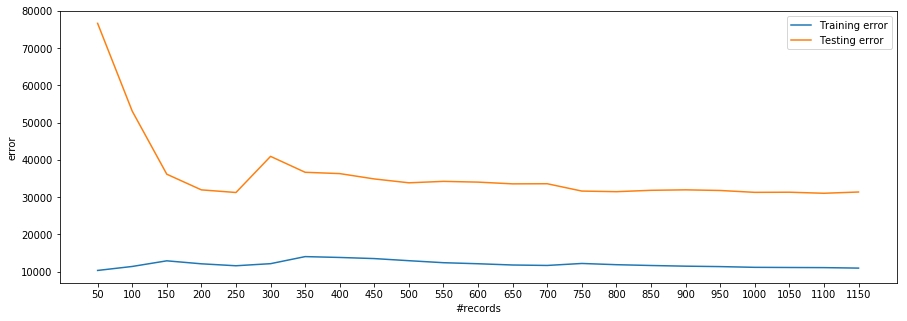

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,5))

learning_curve['Number of records'] = learning_curve['Number of records'].astype('category').astype('str')

plt.plot(learning_curve['Number of records'],learning_curve['Training error'])
plt.plot(learning_curve['Number of records'],learning_curve['Testing error'])

plt.ylabel('error')
plt.xlabel('#records')
plt.legend()

#plt.legend(prop={'size': 10})

#### From above learning curve its very clear that model is overfitting(it has variance problem). One remedy is to get more training data. We are training our random forest on just 1200 records which is very small. Other option is to try other ML models